# **ITD214-Applied Data Science Project**

# **Enhancing Sportswear Apps User Experience through Review Analytics**

# **Student Id: 5504890N**




```
# This is the structure of my solution notebook.

ITD214 Applied Data Science Project
Enhancing Sportswear Apps User Experience through Review Analytics
Student Id: 5504890N

Import required libraries
1.Business Understanding
  1.1 Business Problem
  1.2 Objective 2: Sentiment Quantification and Pattern Analysis
  1.3 Success Criteria
2.Data Understanding & Quality
3.Data Preparation
	3.1 Dataset Backup & Structural Cleaning
  3.2 Text Cleaning & Feature Engineering
  3.3 Target Variable Construction (Sentiment Label)
4. Pattern Analysis
	4.1 Sentiment by Brand (Distribution)
	4.2 Engagement Analysis (Engagement by Brand + Sentiment)
	4.3 Engagement(thumbs up) Behaviour by Sentiment (Overall)
	4.4 Sentiment Over Time (Monthly Trend)
	4.5 Text Pattern Analysis
		4.5.1 Word Frequency (Unigram – Adidas Negative Reviews)
		4.5.2 Bigram Analysis
			4.5.2.1 Key Complaint Themes (Negative Reviews)
			4.5.2.2 Key Success Drivers (Positive Reviews)
			4.5.2.3 Comparison of Sentiment Patterns
5. Modelling
	5.1 Train–Test Split
	5.2 BoW Vectorisation
	5.3 Model Training - Multinomial Naive Bayes (BoW)
	5.4 Model Training - Logistic Regression (BoW)
	5.5 Model Performance Comparison (BoW)
	5.6 TF-IDF Feature Representation (Unigram)
		5.6.1 TF-IDF Vectorisation (1,1)
		5.6.2 Train Naive Bayes (TF-IDF 1,1)
    5.6.3 Train Logistic Regression (TF-IDF 1,1)
		5.6.4 Train Support Vector Machine (TF-IDF 1,1)
		5.6.5 Append to Comparison Table & Model Performance Comparison
	5.7 Hyperparameter Tuning – TF-IDF + SVM
		5.7.1 GridSearchCV Setup (Moderate)
		5.7.2 Evaluate Tuned Model on Test Set
		5.7.3 Compare Against BoW+NB Baseline (baseline)
		5.7.4 Confusion Matrix – 3-Class Baseline (BoW + Naive Bayes)
	5.8 Model Improvement – Binary Dissatisfaction Detection
    5.8.1 Binary Redesign (Drop Neutral + Reclassify target)
    5.8.2 Binary Class Distribution
    5.8.3 Train–Test Split (Binary)
    5.8.4 Binary Model Implementation (Imbalance-aware)
          •	TF-IDF + LinearSVC (class_weight="balanced")
          •	TF-IDF + Logistic Regression (class_weight="balanced")
          •	TF-IDF + ComplementNB
    5.8.5 Binary Model Evaluation
6. Evaluation
	6.1 Performance Analysis (3-Class vs Binary Comparison)
	6.2 Final Model Selection
	6.3 Business Implication
7. Business Insights & Recommendations
8. AI Ethics Considerations
9. Limitations


```



# Import required libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Import required libraries
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 1.**Business Understanding**

## 1.1 **Business Problem**

Sportswear mobile applications (Nike, Adidas, Puma, Gymshark) rely heavily on user reviews to monitor customer satisfaction and service performance. However, manually analyzing thousands of reviews is inefficient and time-consuming.

The key business challenge is to:
- Quantify customer sentiment
- Identify dissatisfaction patterns
- Detect recurring complaint themes
- Provide actionable insights to improve user experience


## 1.2 **Objective 2: Sentiment Quantification and Pattern Analysis**

**Goal:**  
Develop a supervised sentiment prediction model using review text, with sentiment labels derived from the **score** (star rating) column. Then, analyse sentiment patterns across brands and engagement indicators (e.g., thumbs_up, review length, time) to generate actionable app improvement insights.

**Rationale:**  
Sentiment labels are derived from star ratings to quantify sentiment consistently at scale across brands. Machine learning is used to learn text patterns aligned with these labels and to compare feature representations (BoW vs TF-IDF). Modelling evaluates whether review text alone can reproduce these rating-based labels, enabling automated sentiment monitoring for future incoming reviews.



## 1.3 **Success Criteria**

The project will be considered successful if it meets both analytical and business objectives:

**Analytical Success**

- Sentiment distribution is clearly quantified across brands.
- Recurring complaint themes are identified using text pattern analysis.
- Engagement behaviour (e.g., thumbs-up counts, review length, time trends) is analysed.
- The supervised sentiment model achieves strong and balanced classification performance, prioritising Macro F1-score to address class imbalance.


**Business Success**

- The system enables scalable monitoring of large volumes of app reviews.
- High-engagement negative reviews (e.g., reviews with high thumbs-up counts) can be prioritised as early warning signals.
- Key drivers of dissatisfaction (e.g., refund issues, delivery delays, login problems) are identified to guide operational improvements.
- The analysis provides actionable, data-driven recommendations to improve user experience and strengthen brand competitiveness.



# 2.**Data Understanding & Quality**

## Dataset Source
**Dataset name:** Sportswear App Reviews (Google Play)  
**Platform:** Kaggle  
**Description:** Google Play Store user reviews collected from four sportswear mobile applications: **Nike, adidas, PUMA, and Gymshark**.  
The dataset includes review text (**content**), star rating (**score**), engagement (**thumbs_up**), app version (**review_created_version**), timestamps, and brand.

**Reference:**  
Kaggle – "sportswear-app-reviews-google-play" (reviews.csv)  
https://www.kaggle.com/datasets/krisbruurs/sportswear-app-reviews-google-play?select=reviews.csv

## Key Variables Used
- brand – Application brand
- score – Original star rating (1–5)
- content – Review text
- **clean_content – Preprocessed review text used for modelling**
- thumbs_up – Number of users who found the review helpful
- review_created_version – App version at time of review
- **sentiment_label – Derived sentiment category (Positive/Neutral/Negative)**
- **content_length_chars – Review length (characters)**
- **content_length_words – Review length (words)**


*Note: sentiment_label, clean_content, and review length features are engineered during Data Preparation and used in modelling/pattern analysis.*


## Data Selection Rationale
Four major sportswear brands (Nike, Adidas, PUMA, Gymshark) were selected to enable comparative analysis of user sentiment and engagement patterns across different market leaders.


reply_content was excluded because the focus of this study is on user-generated feedback rather than brand responses.


Reviews with empty or near-empty processed text were removed, as they provide no meaningful signal for text modelling and pattern analysis.


Preprocessing primarily retains English alphabetic text, therefore non-English or mixed-language reviews may be underrepresented (limitation).



## Data Quality Summary
- reply_content contains 93.25% missing values and is excluded.
- review_created_version contains ~10.55% missing values.
- No duplicate rows detected.
- Before preprocessing, 4–5 star reviews account for 74.11%, indicating an initial class imbalance.
- During text preprocessing, **118 rows** produced empty `clean_content` and were removed before modelling to prevent invalid inputs and ensure reliable text-based learning.


**Note:** Upload `reviews.csv` into the Colab working directory (or mount Google Drive and update the path) before running `pd.read_csv()`.

In [2]:
# Load dataset
df = pd.read_csv("reviews.csv")

In [3]:
# Quick look at data structure
display(df.head())

,brand,review_id,score,at,content,reply_content,thumbs_up,review_created_version
0,nike,4e0beb34-9bc6-4dfb-9f73-8cf3750571fa,5,2025-10-10 05:12:32,great!,NaN,0,25.46.1
1,nike,a944523b-a77a-4709-a77c-bd6c7e722be1,5,2025-10-10 03:59:34,excellent,NaN,0,25.45.1
2,nike,b6b37895-02bc-4986-9316-0a830b0ead7d,4,2025-10-10 03:36:42,"If I didn’t have to keep logging in, it would ...",NaN,0,25.46.1
3,nike,1b6d59fa-7c85-4f4a-8232-5710bd15c80d,2,2025-10-10 02:53:05,not user friendly,NaN,0,NaN
4,nike,85e31a6e-4695-4aae-8af6-44dde7719610,5,2025-10-10 02:41:37,Amazing,NaN,0,25.46.1


In [4]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print()
# Column info
df.info()

Dataset shape: (6446, 8)

Columns:
 ['brand', 'review_id', 'score', 'at', 'content', 'reply_content', 'thumbs_up', 'review_created_version']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   brand                   6446 non-null   object
 1   review_id               6446 non-null   object
 2   score                   6446 non-null   int64 
 3   at                      6446 non-null   object
 4   content                 6446 non-null   object
 5   reply_content           435 non-null    object
 6   thumbs_up               6446 non-null   int64 
 7   review_created_version  5766 non-null   object
dtypes: int64(2), object(6)
memory usage: 403.0+ KB


In [5]:
# Missing values check / Data Quality Summary
#df.isnull().sum().sort_values(ascending=False)
quality = pd.DataFrame({
    "Column": df.columns,
    "Missing (%)": (df.isna().mean() * 100).round(2),
    "Example": [df[c].dropna().iloc[0] if df[c].notna().any() else None for c in df.columns]
})

quality = quality.sort_values(by="Missing (%)", ascending=False)
display(quality)

,Column,Missing (%),Example
reply_content,reply_content,93.25,Thanks for your review. Latest version was mis...
review_created_version,review_created_version,10.55,25.46.1
brand,brand,0.00,nike
review_id,review_id,0.00,4e0beb34-9bc6-4dfb-9f73-8cf3750571fa
at,at,0.00,2025-10-10 05:12:32
score,score,0.00,5
content,content,0.00,great!
thumbs_up,thumbs_up,0.00,0


In [6]:
#Check full dupliate rows
df.duplicated().sum()

np.int64(0)

In [7]:
brand_counts_before = df["brand"].value_counts(dropna=False)
brand_pct_before = (brand_counts_before / len(df) * 100).round(2)

brand_summary_before = pd.DataFrame({
    "count": brand_counts_before,
    "percent (%)": brand_pct_before
})

print("Brand Distribution (BEFORE cleaning)")
display(brand_summary_before)

Brand Distribution (BEFORE cleaning)


,count,percent (%)
brand,,
nike,2000,31.03
adidas,2000,31.03
puma,2000,31.03
gymshark,446,6.92


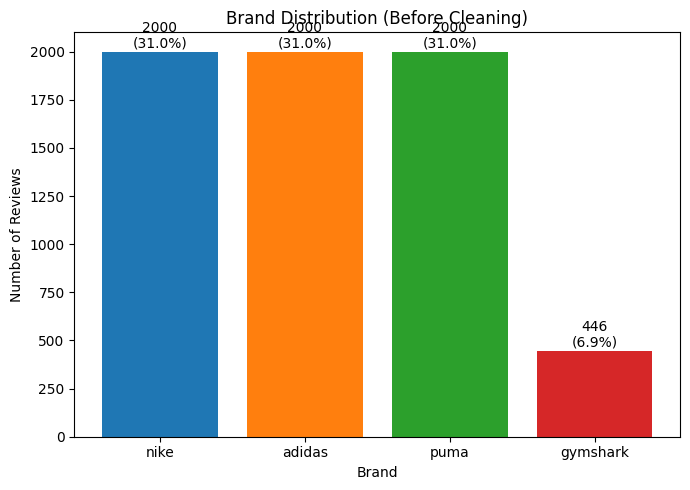

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # change as you like

bars = plt.bar(
    brand_counts_before.index,
    brand_counts_before.values,
    color=colors
)

plt.title("Brand Distribution (Before Cleaning)")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")

# Add labels
for bar, pct in zip(bars, brand_pct_before):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 20,
        f"{int(height)}\n({pct:.1f}%)",
        ha="center"
    )

plt.tight_layout()
plt.show()


Score distribution:
       count  percent (%)
score                    
1       1206        18.71
2        209         3.24
3        254         3.94
4        517         8.02
5       4260        66.09


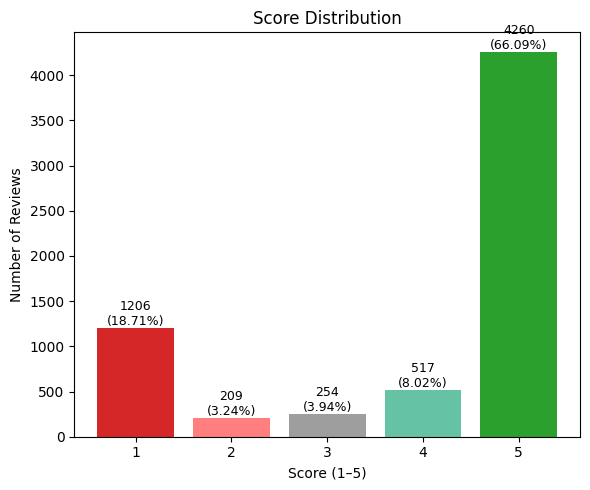

In [9]:
score_counts = df["score"].value_counts().sort_index()
score_percent = (score_counts / score_counts.sum() * 100).round(2)
print("\nScore distribution:")
print(pd.DataFrame({"count": score_counts, "percent (%)": score_percent}))

plt.figure(figsize=(6,5))

colors = ["#d62728", "#ff7f7f", "#9e9e9e", "#66c2a5", "#2ca02c"]
# red → light red → grey → light green → green

bars = plt.bar(
    score_counts.index,
    score_counts.values,
    color=colors
)

plt.xlabel("Score (1–5)")
plt.ylabel("Number of Reviews")
plt.title("Score Distribution")
plt.xticks([1, 2, 3, 4, 5])

for bar, pct in zip(bars, score_percent):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}\n({pct}%)",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

**Observation - Score Distribution:**

Although 74% of reviews are positive (4–5 stars), the substantial proportion of 1-star ratings highlights recurring dissatisfaction that may lead to user churn if unresolved.

thumbs_up data type: int64

thumbs_up summary:
count    6446.000000
mean        1.776606
std        16.912894
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       632.000000
Name: thumbs_up, dtype: float64


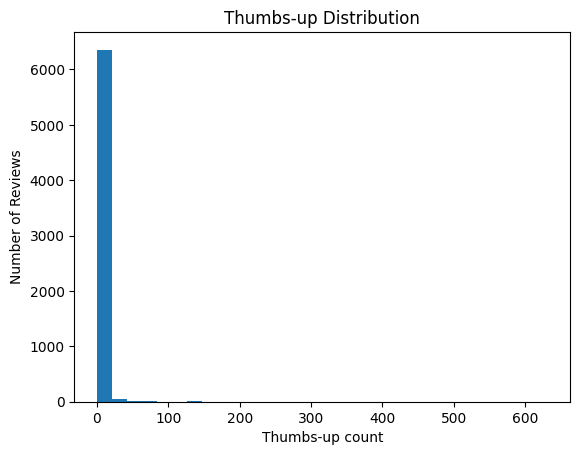

In [10]:
# thumbs_up distribution
print("thumbs_up data type:", df["thumbs_up"].dtype)
print("\nthumbs_up summary:")
print(df["thumbs_up"].describe())

plt.figure()
plt.hist(df["thumbs_up"], bins=30)
plt.xlabel("Thumbs-up count")
plt.ylabel("Number of Reviews")
plt.title("Thumbs-up Distribution")
plt.show()

In [11]:
# Identify the top 5 "High-Impact" Negative Reviews
top_negative_engagement = df[df['score'] <= 2].sort_values(by='thumbs_up', ascending=False).head(5)

# Display as a styled dataframe table
top_negative_engagement[['content', 'thumbs_up', 'score', 'at']].style.set_properties(**{'text-align': 'left'})

,content,thumbs_up,score,at
3813,"Shoes are 50/50. Doesn't seem to be much in-between. All other products are almost always great. My continued issue with this app is things like returns, customer service, logistics, and most of all when they send a defected product. A pair of shoes I just ordered looked and felt amazing, but the tongue was completely falling apart. Returns doesn't have a defective/damaged/other option. Just options that make it seem like the buyer made a mistake. The 3 week wait for a refund is also ridiculous",632,1,2024-10-22 23:39:55
3833,"This is a good app, when there aren't bugs. I've had a couple issues where pages were hanging and didn't load. Normally not a problem but the pages in question were contest entry pages and the hanging prevented me from entering. More recently my order history just disappeared entirely from the app. When I login to the website on a desktop everything is there so I know it is a problem with the app. Unfortunately, the help staff couldn't do anything about it. EDIT: The app is scuffed.",542,2,2024-10-20 21:28:24
1446,"Very buggy at times. Had an issue checking out i had to uninstall clear mt browser cookies and clear app cache and storage not the best/convenient when you're trying to buy a limited edition shoes. Shopping cart has this bug since last year where it so hard and takes effort tp swipe left on an item to select ""add to favorites"" or ""delete from cart"" as it doesnt snap easily with a swipe its like the snapping area is 10px at the very edge of screen its like a minigame but made to frustrate you.",219,1,2025-07-23 12:29:01
2734,"It is strange that the app of a company like adidas has obvious app design problem. Biggest one is that the wishlist is not in sync through your devices and its just saving locally, every time you logging out your wishlist is gone!!!. Update , After two years of previous review , wishlist is not yet synced. If you switch to a new phone all your wishlist is gone. Welcome to year 1950!",117,1,2025-02-27 01:18:19
3103,"Incredibly frustrating. App doesn't sync with favorites from the web, so if you're using a browser on your PC and then want to use the app... not in sync, nothing shows up. That's just poor development work. Second, gift cards are a disaster. They really need to change their processor - doesn't matter how many credit or debit cards I try to use to make a purchase everyone sees the transaction as fraudulent and declines the purchase. Use a reputable company, you're losing business.",116,1,2024-12-30 21:04:31


**Observation**

While the overall rating distribution is heavily skewed towards positive feedback, engagement analysis reveals that certain negative reviews receive exceptionally high thumbs-up counts.


The most agreed-upon complaints relate to:
- Defective product returns and refund delays,
- App stability issues (page loading failures, disappearing order history),
- Wishlist and synchronization problems across devices.

These high-engagement reviews suggest that dissatisfaction is concentrated around operational reliability and system performance rather than product assortment. Although negative reviews are fewer in number, those with high engagement may disproportionately influence public perception and should be prioritised for corrective action.

In [12]:
# review_created_version (keep + report missing)
if "review_created_version" in df.columns:
    print("\nMissing review_created_version:", df["review_created_version"].isna().sum())


Missing review_created_version: 680


# 3.**Data Preparation**


This section describes the data cleaning, text preprocessing, feature engineering, and sentiment label construction steps performed to prepare the dataset for supervised modelling.





## 3.1 Dataset Backup & Structural Cleaning

- Backup raw dataset
- Standardise column names & Rename at => revewi_datetime
- Drop reply_content
- Brand cleaning + validation
- Convert review_datetime to datetime
- Create time-based feature (year_month) for temporal analysis
- Validate score range (1–5)

In [13]:
#Backup raw dataset before cleaning data
df_clean = df.copy()

In [14]:
#Column standardisation
df_clean.columns = df_clean.columns.str.strip().str.lower()
print("Columns after standardisation:")
print(df_clean.columns.tolist())

# Rename for clarity
df_clean = df_clean.rename(columns={"at": "review_datetime"})
print("\nColumns after renaming for clarity:")
print(df_clean.columns.tolist())

Columns after standardisation:
['brand', 'review_id', 'score', 'at', 'content', 'reply_content', 'thumbs_up', 'review_created_version']

Columns after renaming for clarity:
['brand', 'review_id', 'score', 'review_datetime', 'content', 'reply_content', 'thumbs_up', 'review_created_version']


In [15]:
#Drop reply_content (unused + high missing)
df_clean = df_clean.drop(columns=["reply_content"], errors="ignore")
print(df_clean.columns.tolist())

['brand', 'review_id', 'score', 'review_datetime', 'content', 'thumbs_up', 'review_created_version']


In [16]:
# Brand Validation / Validate brand values (should be 4 brands)
df_clean["brand"] = df_clean["brand"].astype(str).str.strip().str.lower()

print("\nBrand value counts:")
print(df_clean["brand"].value_counts(dropna=False))

expected_brands = {"nike", "adidas", "puma", "gymshark"}
actual_brands = set(df_clean["brand"].astype(str).str.lower().unique())
unexpected_brands = actual_brands - expected_brands
print("\nUnexpected brands (if any):", unexpected_brands)


Brand value counts:
brand
nike        2000
adidas      2000
puma        2000
gymshark     446
Name: count, dtype: int64

Unexpected brands (if any): set()


In [17]:
# Brand Distribution
brand_counts_after = df_clean["brand"].value_counts(dropna=False)
brand_pct_after = (brand_counts_after / len(df_clean) * 100).round(2)

brand_summary_after = pd.DataFrame({
    "count": brand_counts_after,
    "percent (%)": brand_pct_after
})

print("Brand Distribution (AFTER cleaning)")
display(brand_summary_after)

Brand Distribution (AFTER cleaning)


,count,percent (%)
brand,,
nike,2000,31.03
adidas,2000,31.03
puma,2000,31.03
gymshark,446,6.92


In [18]:
#Datetime conversion / Convert review_datetime to datetime
df_clean["review_datetime"] = pd.to_datetime(df_clean["review_datetime"], errors="coerce")

print("\nMissing review_datetime after conversion:", df_clean["review_datetime"].isna().sum(), "\n")
df_clean.info()


Missing review_datetime after conversion: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   brand                   6446 non-null   object        
 1   review_id               6446 non-null   object        
 2   score                   6446 non-null   int64         
 3   review_datetime         6446 non-null   datetime64[ns]
 4   content                 6446 non-null   object        
 5   thumbs_up               6446 non-null   int64         
 6   review_created_version  5766 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 352.6+ KB


In [19]:
# Create Year-Month feature for time-based analysis
df_clean["year_month"] = df_clean["review_datetime"].dt.to_period("M")

print("Year-Month feature created.")
df_clean.info()

Year-Month feature created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6446 entries, 0 to 6445
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   brand                   6446 non-null   object        
 1   review_id               6446 non-null   object        
 2   score                   6446 non-null   int64         
 3   review_datetime         6446 non-null   datetime64[ns]
 4   content                 6446 non-null   object        
 5   thumbs_up               6446 non-null   int64         
 6   review_created_version  5766 non-null   object        
 7   year_month              6446 non-null   period[M]     
dtypes: datetime64[ns](1), int64(2), object(4), period[M](1)
memory usage: 403.0+ KB


In [20]:
#Score validation / Validate score range (must be 1 to 5)
df_clean["score"] = pd.to_numeric(df_clean["score"], errors="coerce")

invalid_score_rows = df_clean[~df_clean["score"].between(1, 5)]
print("\nInvalid score rows count:", len(invalid_score_rows))

if len(invalid_score_rows) > 0:
    print("\nExamples of invalid score rows:")
    print(invalid_score_rows[["score", "content"]].head(10).to_string(index=False))


Invalid score rows count: 0


## 3.2 Text Cleaning & Feature Engineering
(Text-level processing + engineered features)

- Create length features (content_length_chars, content_length_words)
- Very short review inspection (report only)
- Text preprocessing → create clean_content
- Detect empty clean_content rows (118)
- Inspect empty row examples
- Remove empty clean_content rows
- Validate final dataset (no null/empty, valid characters only)


Content length summary (words):
count    6446.000000
mean       11.505275
std        16.767036
min         1.000000
25%         2.000000
50%         5.000000
75%        13.000000
max       113.000000
Name: content_length_words, dtype: float64


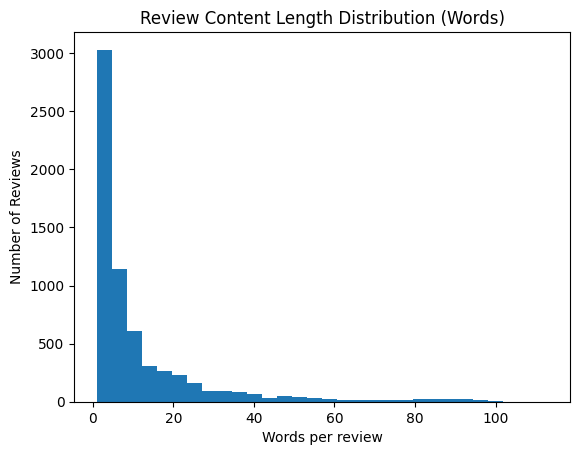

In [21]:
# Length features
# Content checks (text quality)  & Create length features (content_length_chars, content_length_words)
#df_clean["content"] = df_clean["content"].astype(str).str.strip()

# Keep missing values as empty string (avoid "nan" text)
df_clean["content"] = df_clean["content"].fillna("").astype(str).str.strip()

# Remove truly empty / useless content
df_clean = df_clean[df_clean["content"] != ""]
df_clean = df_clean[df_clean["content"].str.lower() != "nan"]

# # Remove empty content
# empty_content = (df_clean["content"] == "").sum()
# print("\nEmpty content rows:", empty_content)
# df_clean = df_clean[df_clean["content"] != ""]

# Content Text length features / EDA / diagnostic features
df_clean["content_length_chars"] = df_clean["content"].str.len()
df_clean["content_length_words"] = df_clean["content"].str.split().str.len()

print("\nContent length summary (words):")
print(df_clean["content_length_words"].describe())

plt.figure()
plt.hist(df_clean["content_length_words"], bins=30)
plt.xlabel("Words per review")
plt.ylabel("Number of Reviews")
plt.title("Review Content Length Distribution (Words)")
plt.show()

In [22]:
# Check how many rows contain the string "nan"
nan_string_count = (df_clean["content"] == "nan").sum()

print("Number of rows where content is the string 'nan':", nan_string_count)

Number of rows where content is the string 'nan': 0


In [23]:
df_clean.head()

,brand,review_id,score,review_datetime,content,thumbs_up,review_created_version,year_month,content_length_chars,content_length_words
0,nike,4e0beb34-9bc6-4dfb-9f73-8cf3750571fa,5,2025-10-10 05:12:32,great!,0,25.46.1,2025-10,6,1
1,nike,a944523b-a77a-4709-a77c-bd6c7e722be1,5,2025-10-10 03:59:34,excellent,0,25.45.1,2025-10,9,1
2,nike,b6b37895-02bc-4986-9316-0a830b0ead7d,4,2025-10-10 03:36:42,"If I didn’t have to keep logging in, it would ...",0,25.46.1,2025-10,55,12
3,nike,1b6d59fa-7c85-4f4a-8232-5710bd15c80d,2,2025-10-10 02:53:05,not user friendly,0,NaN,2025-10,17,3
4,nike,85e31a6e-4695-4aae-8af6-44dde7719610,5,2025-10-10 02:41:37,Amazing,0,25.46.1,2025-10,7,1


In [24]:
# Very short reviews inspection
short_threshold = 3
short_reviews = df_clean[df_clean["content_length_words"] <= short_threshold]
print(f"\nVery short reviews (<= {short_threshold} words): {len(short_reviews)}"
      f"({len(short_reviews)/len(df_clean)*100:.2f}%)")

print("\nExamples of very short reviews:")
print(short_reviews[["score", "content"]].head(10).to_string(index=False))


Very short reviews (<= 3 words): 2624(40.71%)

Examples of very short reviews:
 score           content
     5            great!
     5         excellent
     2 not user friendly
     5           Amazing
     5          the best
     5          yezzzirr
     5       easy to use
     5         great app
     5              good
     5         very good


Text Preprocessing for Sentiment Modelling

In [25]:
# raw text preview
df_clean['content'].head(30)

,content
0,great!
1,excellent
2,"If I didn’t have to keep logging in, it would ..."
3,not user friendly
4,Amazing
5,Unbelievable. a must have for any sneaker head!!
6,"Today I get an error message - ""error parsing ..."
7,cant sign in. get the below error Error parsin...
8,the best
9,yezzzirr


In [26]:
# Raw text diagnostics (Before Cleaning)
# =========================

# Uppercase letters
uppercase_count = df_clean["content"].astype(str).str.contains(r"[A-Z]", na=False).sum()
print("Number of reviews containing at least one uppercase letter (A–Z):", uppercase_count)

# Special characters / punctuation
# [^\w\s] = NOT (word char) AND NOT whitespace
special_char_count = df_clean["content"].astype(str).str.contains(r"[^\w\s]", na=False).sum()
print("Number of reviews containing special characters or punctuation:", special_char_count)

# Emojis (more specific check)
emoji_original = df_clean["content"].astype(str).str.contains(r"[\U00010000-\U0010ffff]", na=False).sum()
print("Number of reviews containing emojis (original text):", emoji_original)

# Non-ASCII characters (broader: emojis, accented letters, other scripts)
non_ascii_original = df_clean["content"].astype(str).str.contains(r"[^\x00-\x7F]", na=False).sum() # Find anything NOT between ASCII 0–127
print("Number of reviews containing non-ASCII characters (original text):", non_ascii_original)


Number of reviews containing at least one uppercase letter (A–Z): 3422
Number of reviews containing special characters or punctuation: 3479
Number of reviews containing emojis (original text): 661
Number of reviews containing non-ASCII characters (original text): 823


In [27]:
# Reviews containing special characters / punctuation
special_char_rows = df_clean[
    df_clean["content"].astype(str)
    .str.contains(r"[^\w\s]", na=False)
]

print("Number of reviews containing special characters or punctuation:", special_char_count, "\n")
display(special_char_rows[["content"]].head(10))

Number of reviews containing special characters or punctuation: 3479 



,content
0,great!
2,"If I didn’t have to keep logging in, it would ..."
5,Unbelievable. a must have for any sneaker head!!
6,"Today I get an error message - ""error parsing ..."
7,cant sign in. get the below error Error parsin...
11,Thieves at warehouse. I mailed back 2 pairs of...
14,Amazing I love nike only thing is that it ofte...
16,I've been a Nike lover for years . Now I got t...
22,"very easy to use, love it!"
27,"Great 👍 deals, mega quick free postage, thank ..."


In [28]:
# Reviews containing emojis
emoji_rows = df_clean[
    df_clean["content"].astype(str)
    .str.contains(r"[\U00010000-\U0010ffff]", na=False)
]

print("Number of reviews containing emojis (original text):", emoji_original , "\n")
display(emoji_rows[["content"]].head(10))

Number of reviews containing emojis (original text): 661 



,content
11,Thieves at warehouse. I mailed back 2 pairs of...
27,"Great 👍 deals, mega quick free postage, thank ..."
30,👍 great
37,Stunning😉!!
46,👍👍👍
62,good 👍😊
82,Inspiring. Iconic. Innovative. Invincible. Ine...
117,Great Options💯
127,"I love it, convenient and easy to looking to s..."
129,Perfect 👌🏾


In [29]:
# Reviews containing non-ASCII characters
non_ascii_rows = df_clean[
    df_clean["content"].astype(str)
    .str.contains(r"[^\x00-\x7F]", na=False)
]

print("Number of reviews containing non-ASCII characters (original text):", non_ascii_original, "\n")
display(non_ascii_rows[["content"]].head(10))

Number of reviews containing non-ASCII characters (original text): 823 



,content
2,"If I didn’t have to keep logging in, it would ..."
11,Thieves at warehouse. I mailed back 2 pairs of...
27,"Great 👍 deals, mega quick free postage, thank ..."
30,👍 great
37,Stunning😉!!
46,👍👍👍
62,good 👍😊
71,checks over stripes✔️
82,Inspiring. Iconic. Innovative. Invincible. Ine...
117,Great Options💯


In [30]:
df_clean["content"].astype(str).str.findall(r"[^\w\s]").explode().value_counts().head(10)

,count
content,
.,5555
",",1780
',1616
!,1051
👍,231
?,191
-,173
️,160
"""",154


In [31]:
# Preprocessing Setup
# =========================

stop_words = set(stopwords.words("english"))

# Keep negation words (important for sentiment)
negations = {"no", "nor", "not", "dont", "never", "cannot", "cant", "wont"}
stop_words = stop_words - negations


def preprocess_text(text):
    text = str(text).lower().strip()

    # Handle negations first (normalize common forms)
    text = re.sub(r"can't", "cant", text)
    text = re.sub(r"won't", "wont", text)
    text = re.sub(r"n't", "nt", text)

    # Remove non-letters (keep only a-z and spaces)
    # non-letters:
        # Emojis 😊
        # Numbers (1,2,3)
        # Punctuation (!,?,.)
        # Symbols (#,@,$)
        # Accented letters (é, ñ)
        # All non-ASCII characters
    text = re.sub(r"[^a-z\s]", " ", text)

    # Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Stopword removal (negations are kept)
    tokens = [w for w in tokens if w not in stop_words]

    # Stemming intentionally removed to preserve word clarity
    return " ".join(tokens)


# Apply preprocessing
df_clean["clean_content"] = df_clean["content"].apply(preprocess_text)
df_clean[["content", "clean_content"]].head(30)

,content,clean_content
0,great!,great
1,excellent,excellent
2,"If I didn’t have to keep logging in, it would ...",keep logging would better
3,not user friendly,not user friendly
4,Amazing,amazing
5,Unbelievable. a must have for any sneaker head!!,unbelievable must sneaker head
6,"Today I get an error message - ""error parsing ...",today get error message error parsing response...
7,cant sign in. get the below error Error parsin...,cant sign get error error parsing response server
8,the best,best
9,yezzzirr,yezzzirr


In [32]:
# Post-cleaning validation
# =========================

## After cleaning, clean_content should contain ONLY a-z and spaces
invalid_after = df_clean["clean_content"].astype(str).str.contains(r"[^a-z\s]", na=False).sum()
print("Number of cleaned reviews still containing non a-z characters:", invalid_after)

# Empty / null checks
null_count = df_clean["clean_content"].isnull().sum()
empty_count = (df_clean["clean_content"].astype(str).str.strip() == "").sum()

print("Clean content null count:", null_count)
print("Number of empty reviews after text cleaning:", empty_count)

Number of cleaned reviews still containing non a-z characters: 0
Clean content null count: 0
Number of empty reviews after text cleaning: 118


In [33]:
#  Check empty clean_content rows
# =========================================

empty_rows = df_clean[df_clean["clean_content"].astype(str).str.strip() == ""]
print("Shape of filtered empty rows (rows, columns):", empty_rows.shape)

# Check score distribution of empty rows (useful to justify removal)
print("\nTotal empty rows:", empty_rows.shape[0])
print("\nScore distribution of empty rows:")
print(empty_rows["score"].value_counts().sort_index())

Shape of filtered empty rows (rows, columns): (118, 11)

Total empty rows: 118

Score distribution of empty rows:
score
1     8
3     1
4    11
5    98
Name: count, dtype: int64


In [34]:
empty_rows[["content", "clean_content", "score"]].head(20)

,content,clean_content,score
46,👍👍👍,,5
190,✌️,,5
208,👍,,5
249,🌟 🌟🌟🌟,,5
276,😍,,5
295,👍 👌,,5
329,🔥🔥🔥🔥,,5
350,👍👍👍👍👍,,5
367,just did it.,,5
426,just do it 🍻,,5


In [35]:
# Remove empty clean_content rows

df_clean = df_clean[df_clean["clean_content"].astype(str).str.strip() != ""]
print("\nRemaining rows after removing empty rows:", df_clean.shape)


Remaining rows after removing empty rows: (6328, 11)


In [36]:
# Final Validation after removing emtpy rows
#=============================================

#Confirm no empty rows remain
print("Remaining empty rows:", (df_clean["clean_content"].str.strip() == "").sum())

#Confirm no invalid characters remain
invalid_after = df_clean["clean_content"].str.contains(r"[^a-z\s]", na=False).sum()
print("\nInvalid characters remaining:", invalid_after)

print("\nFinal dataset shape:", df_clean.shape)

Remaining empty rows: 0

Invalid characters remaining: 0

Final dataset shape: (6328, 11)


Rows with empty clean_content were removed before modelling to ensure the text-based models are trained only on reviews with usable textual information.



After preprocessing, the dataset contains 6,328 valid reviews with engineered features and sentiment labels, ready for modelling.

## 3.3 Target Variable Construction (Sentiment Label)


- Create sentiment_label from score
- Cross-tab score vs label  (counts + %)
- Invalid mapping check
- Manual spot check
- Sentiment label distribution

In [37]:
# Create sentiment labels from score
def score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df_clean["sentiment_label"] = df_clean["score"].apply(score_to_sentiment)

# Check if any unexpected values
print("\nMissing sentiment labels:", df_clean["sentiment_label"].isna().sum())

# Drop rows if any invalid mapping (should be 0)
df_clean = df_clean[df_clean["sentiment_label"].notna()]

print("\ndf_clean Shape: " , df_clean.shape)

display(df_clean.head())


Missing sentiment labels: 0

df_clean Shape:  (6328, 12)


,brand,review_id,score,review_datetime,content,thumbs_up,review_created_version,year_month,content_length_chars,content_length_words,clean_content,sentiment_label
0,nike,4e0beb34-9bc6-4dfb-9f73-8cf3750571fa,5,2025-10-10 05:12:32,great!,0,25.46.1,2025-10,6,1,great,positive
1,nike,a944523b-a77a-4709-a77c-bd6c7e722be1,5,2025-10-10 03:59:34,excellent,0,25.45.1,2025-10,9,1,excellent,positive
2,nike,b6b37895-02bc-4986-9316-0a830b0ead7d,4,2025-10-10 03:36:42,"If I didn’t have to keep logging in, it would ...",0,25.46.1,2025-10,55,12,keep logging would better,positive
3,nike,1b6d59fa-7c85-4f4a-8232-5710bd15c80d,2,2025-10-10 02:53:05,not user friendly,0,NaN,2025-10,17,3,not user friendly,negative
4,nike,85e31a6e-4695-4aae-8af6-44dde7719610,5,2025-10-10 02:41:37,Amazing,0,25.46.1,2025-10,7,1,amazing,positive


In [38]:
print("Final Cleaned Dataset Shape: " , df_clean.shape, "\n")
df_clean.info()

Final Cleaned Dataset Shape:  (6328, 12) 

<class 'pandas.core.frame.DataFrame'>
Index: 6328 entries, 0 to 6445
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   brand                   6328 non-null   object        
 1   review_id               6328 non-null   object        
 2   score                   6328 non-null   int64         
 3   review_datetime         6328 non-null   datetime64[ns]
 4   content                 6328 non-null   object        
 5   thumbs_up               6328 non-null   int64         
 6   review_created_version  5657 non-null   object        
 7   year_month              6328 non-null   period[M]     
 8   content_length_chars    6328 non-null   int64         
 9   content_length_words    6328 non-null   int64         
 10  clean_content           6328 non-null   object        
 11  sentiment_label         6328 non-null   object        
dtypes: datetim

In [39]:
# Validate the transformation(score to label) introduce errors or not

# Cross-tab (Counts) to checks how many rows fall into each mapping.
score_count_table = pd.crosstab(df_clean["score"], df_clean["sentiment_label"])

# Cross-tab (Row %) to chech for each score, what % of sentiment labels does it map to
score_pct_table = pd.crosstab(
    df_clean["score"],
    df_clean["sentiment_label"],
    normalize="index"
) * 100

score_pct_table = score_pct_table.round(2)

# Combine Count + Percentage
combined_table = score_count_table.copy()

for col in score_count_table.columns:
    combined_table[col] = (
        score_count_table[col].astype(str)
        + " ("
        + score_pct_table[col].map("{:.2f}".format)
        + "%)"
    )

# Styled display - Count, Row %, Color gradients
styled_combined = (
    combined_table.style
    .background_gradient(
        cmap="Reds",
        subset=["negative"],
        gmap=score_pct_table["negative"]
    )
    .background_gradient(
        cmap="Greens",
        subset=["positive"],
        gmap=score_pct_table["positive"]
    )
    .set_caption("Score vs Sentiment Label (Count with Row %)")
)
display(styled_combined)

sentiment_label,negative,neutral,positive
score,,,
1,1198 (100.00%),0 (0.00%),0 (0.00%)
2,209 (100.00%),0 (0.00%),0 (0.00%)
3,0 (0.00%),253 (100.00%),0 (0.00%)
4,0 (0.00%),0 (0.00%),506 (100.00%)
5,0 (0.00%),0 (0.00%),4162 (100.00%)


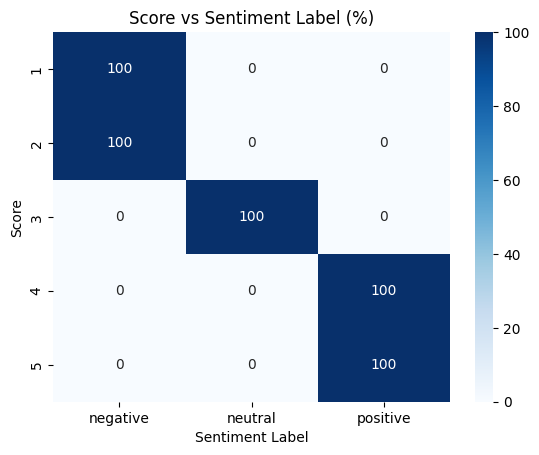

In [40]:
import seaborn as sns

plt.figure()
sns.heatmap(score_pct_table, annot=True, fmt=".0f", cmap="Blues")

plt.title("Score vs Sentiment Label (%)")
plt.xlabel("Sentiment Label")
plt.ylabel("Score")
plt.show()

**Observation (Rule Verification)**

The cross-tabulation confirms that sentiment labels were correctly derived from star ratings.
All 1–2 star reviews are labelled as negative, 3-star reviews as neutral, and 4–5 star reviews as positive.
No mismatches were detected (Mismatch rows = 0), validating the rule-based sentiment construction.

In [41]:
# Invalid mapping check
invalid_mapping = df_clean[
    ((df_clean["score"] <= 2) & (df_clean["sentiment_label"] != "negative")) |
    ((df_clean["score"] == 3) & (df_clean["sentiment_label"] != "neutral")) |
    ((df_clean["score"] >= 4) & (df_clean["sentiment_label"] != "positive"))
]

print("Invalid mapping rows:", invalid_mapping.shape[0])

Invalid mapping rows: 0


In [42]:
# Manual Spot Check by selecting some random rows
df_clean[["score", "sentiment_label", "content"]].sample(10, random_state=42)

,score,sentiment_label,content
1077,5,positive,They have GREAT BASKETBALL SHOES!!!
5982,5,positive,love this app and the deals
4229,5,positive,nice
3633,5,positive,Very convenient app. no issues whatsoever
4440,5,positive,Great 😃👍
4907,5,positive,I have a clothes and shoe store to shop at now...
2716,3,neutral,Why would this not be compatible with the pixe...
4085,5,positive,Good 😊
5508,5,positive,come payday I'm a ordering! 🧟
5738,5,positive,best



df_clean Shape:  (6328, 12)

Sentiment Distribution:
                 count  percent (%)
sentiment_label                    
positive          4668        73.77
negative          1407        22.23
neutral            253         4.00



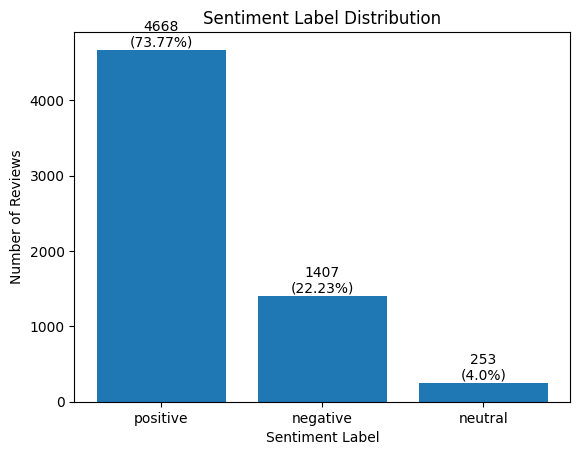

In [43]:
# Verify Sentiment label distribution
label_counts = df_clean["sentiment_label"].value_counts()
label_percent = (label_counts / label_counts.sum() * 100).round(2)

print("\ndf_clean Shape: " , df_clean.shape)

print("\nSentiment Distribution:")
print(pd.DataFrame({"count": label_counts, "percent (%)": label_percent}))
print()

plt.figure()
bars = plt.bar(label_counts.index, label_counts.values)

plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Label Distribution")

# Add count + percentage on top of bars
for bar, pct in zip(bars, label_percent):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}\n({pct}%)",
        ha="center",
        va="bottom"
    )
plt.show()

In [44]:
print(label_counts.sum())

6328


This distribution is computed after removing 118 empty clean_content rows, so the final dataset size is 6,328.

**Observation:**

- The dataset is highly imbalanced.
- Positive reviews dominate (73.77%), while neutral reviews are very small (4.00%).
- This class imbalance will be considered during model training (e.g., using appropriate evaluation metrics or class weighting).


# 4. Pattern Analysis

## 4.1 Sentiment by Brand (Distribution)
- Purpose: Compare sentiment distribution across brands
- Question: Which brand has more positive or negative reviews?

In [45]:
# Cross-tab brand vs sentiment

# Count table
brand_count_table = pd.crosstab(df_clean["brand"], df_clean["sentiment_label"])

# Percentage Table
brand_pct_table  = pd.crosstab(
    df_clean["brand"],
    df_clean["sentiment_label"],
    normalize="index"
) * 100

brand_pct_table  = brand_pct_table .round(2)

# Combine Count + Percentage (for display)
combined_table = brand_count_table.copy()

for col in brand_count_table.columns:
    combined_table[col] = (
        brand_count_table[col].astype(str)
        + " ("
        + brand_pct_table [col].map("{:.2f}".format)
        + "%)"
    )

# Apply Gradient using brand_pct_table  values
styled_combined = (
    combined_table.style
    .background_gradient(
        cmap="Reds",
        subset=["negative"],
        gmap=brand_pct_table ["negative"]
    )
    .background_gradient(
        cmap="Greens",
        subset=["positive"],
        gmap=brand_pct_table ["positive"]
    )
    .set_caption("Brand vs Sentiment (Count with Percentage)")
    .set_table_styles([
        {
            "selector": "caption",
            "props": [
                ("text-decoration", "underline"),
                ("font-weight", "bold"),
                ("font-size", "14px")
            ]
        }
    ])
)
display(styled_combined)

sentiment_label,negative,neutral,positive
brand,,,
adidas,766 (38.98%),120 (6.11%),1079 (54.91%)
gymshark,77 (17.30%),29 (6.52%),339 (76.18%)
nike,373 (19.03%),64 (3.27%),1523 (77.70%)
puma,191 (9.75%),40 (2.04%),1727 (88.20%)


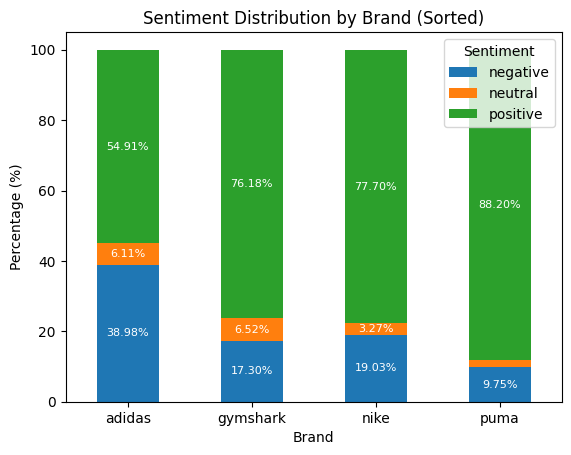

In [46]:
#Plotted stacked percentage bar chart (sorted by positive sentiment)

# Sort by positive sentiment
brand_sentiment_pct_sorted = brand_pct_table.sort_values(by="positive")

ax = brand_sentiment_pct_sorted.plot(kind="bar", stacked=True)

plt.title("Sentiment Distribution by Brand (Sorted)")
plt.xlabel("Brand")
plt.ylabel("Percentage (%)")
plt.legend(title="Sentiment")

# Make brand labels horizontal
plt.xticks(rotation=0)

# Add labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 3:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.2f}%",
                ha="center",
                va="center",
                fontsize=8,
                color="white"
            )

plt.show()

**Observation**

The brand-level sentiment analysis reveals clear variation across the four sportswear applications. Puma is the highest proportion of positive sentiment (88.20%), indicating strong overall user satisfaction. In contrast, Adidas shows the highest proportion of negative reviews (38.98%), which suggests comparatively lower user satisfaction relative to competitors. Nike and Gymshark maintain relatively high positive sentiment levels above 75%, reflecting generally favorable app experiences.

The comparatively elevated negative sentiment for Adidas suggests potential areas for further investigation, such as app stability, feature usability, or customer service performance relative to competitor

## 4.2 Engagement Analysis (Engagement by Brand + Sentiment)
- Purpose: Analyse engagement by brand and sentiment
- Question: For each brand, which sentiment receives the highest thumbs-up?

In [47]:
# Thumbs-up by brand + sentiment
thumbs_brand_sent = (
    df_clean.groupby(["brand","sentiment_label"])["thumbs_up"]
    .mean()
    .round(2)
    .unstack()
)
#print("Average thumbs_up by brand and sentiment:", "\n")
# print(thumbs_brand_sent)

styled_thumbs = (
    thumbs_brand_sent.style
    .highlight_max(axis=1, color="lightgreen")
    .set_caption("Average Thumbs_up by Brand and Sentiment")
)
display(styled_thumbs)

sentiment_label,negative,neutral,positive
brand,,,
adidas,4.530000,1.390000,3.400000
gymshark,4.130000,2.790000,1.950000
nike,1.660000,3.220000,0.610000
puma,1.850000,0.400000,0.550000


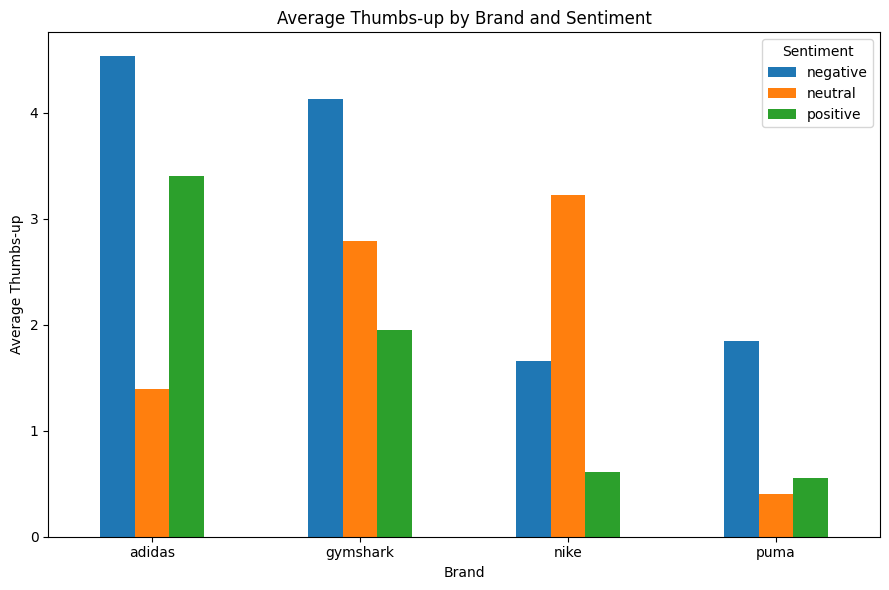

In [48]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
thumbs_brand_sent.plot(
    kind="bar",
    figsize=(9,6)
)

plt.title("Average Thumbs-up by Brand and Sentiment")
plt.xlabel("Brand")
plt.ylabel("Average Thumbs-up")
plt.xticks(rotation=0)

plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


**Observation**

The engagement analysis reveals that negative reviews generally receive higher average thumbs_up compared to positive reviews, particularly for Adidas (4.53) and Gymshark (4.13). This suggests that user complaints tend to attract stronger agreement from other users, indicating shared dissatisfaction.

For Nike, neutral reviews receive relatively higher engagement (3.22), which may indicate user discussions around mixed experiences.

Overall, higher thumbs_up values for negative reviews highlight potentially high-impact issues that warrant prioritised attention.


## 4.3 Engagement(thumbs up) Behaviour by Sentiment (Overall)

- Purpose: Compare engagement across sentiment categories
- Question: Which sentiment attracts the most thumbs-up overall?


In [49]:
# Average thumbs_up by sentiment (overall)
thumbs_sentiment = (
    df_clean
    .groupby("sentiment_label")["thumbs_up"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("thumbs_up", ascending=False)
)

print("Average thumbs_up by sentiment (overall) \n")
display(thumbs_sentiment)

Average thumbs_up by sentiment (overall) 



,sentiment_label,thumbs_up
0,negative,3.39
1,neutral,1.86
2,positive,1.33


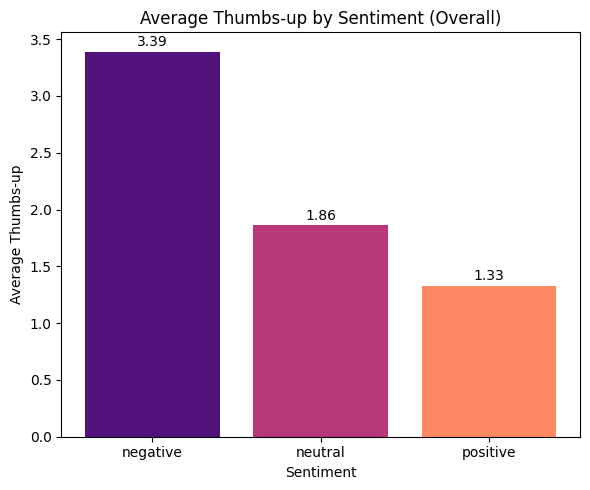

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

# Generate magma palette with 3 colors
colors = sns.color_palette("magma", 3)

bars = plt.bar(
    thumbs_sentiment["sentiment_label"],
    thumbs_sentiment["thumbs_up"],
    color=colors
)

plt.title("Average Thumbs-up by Sentiment (Overall)")
plt.xlabel("Sentiment")
plt.ylabel("Average Thumbs-up")

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05,
        f"{height:.2f}",
        ha="center"
    )

plt.tight_layout()
plt.show()


In [51]:
# Engagement distribution check (shows skew: many zeros, few viral reviews)
thumbs_stats = df_clean.groupby("sentiment_label")["thumbs_up"].agg(
    count="count",
    mean="mean",
    median="median",
    max="max",
    std="std"
).round(2)

display(thumbs_stats)

,count,mean,median,max,std
sentiment_label,,,,,
negative,1407,3.39,0.0,632,24.08
neutral,253,1.86,0.0,177,11.66
positive,4668,1.33,0.0,440,14.56


**Observation**

Overall, negative reviews receive the highest average thumbs_up (≈3.39), followed by neutral (≈1.86) and positive reviews (≈1.33). This suggests that complaints tend to attract stronger agreement from other users, indicating shared dissatisfaction.

However, the engagement statistics show that the median thumbs_up is 0 across sentiment classes, meaning most reviews receive no interaction. The higher mean for negative reviews is influenced by a small number of highly engaged negative reviews (large maximum values), suggesting that a few critical complaints resonate strongly and should be prioritised for improvement actions.


## 4.4 Sentiment Over Time (Monthly Trend)
- Purpose: To examine how user sentiment changes over time and detect potential shifts in user satisfaction levels.
- Question: Does sentiment distribution remain stable over time, or are there noticeable increases in negative or positive sentiment during specific periods?

In [52]:
# Count table
monthly_count = pd.crosstab(
    df_clean["year_month"],
    df_clean["sentiment_label"]
).sort_index()

# Percentage table
monthly_pct = pd.crosstab(
    df_clean["year_month"],
    df_clean["sentiment_label"],
    normalize="index"
) * 100

monthly_pct = monthly_pct.sort_index().round(2)

# Combine into one formatted table
monthly_combined = (
    monthly_count.astype(int).astype(str)
    + " ("
    + monthly_pct.astype(str)
    + "%)"
)

display(monthly_combined.head())

sentiment_label,negative,neutral,positive
year_month,,,
2022-10,0 (0.0%),0 (0.0%),1 (100.0%)
2022-11,3 (100.0%),0 (0.0%),0 (0.0%)
2022-12,1 (100.0%),0 (0.0%),0 (0.0%)
2023-01,0 (0.0%),1 (100.0%),0 (0.0%)
2023-02,1 (100.0%),0 (0.0%),0 (0.0%)


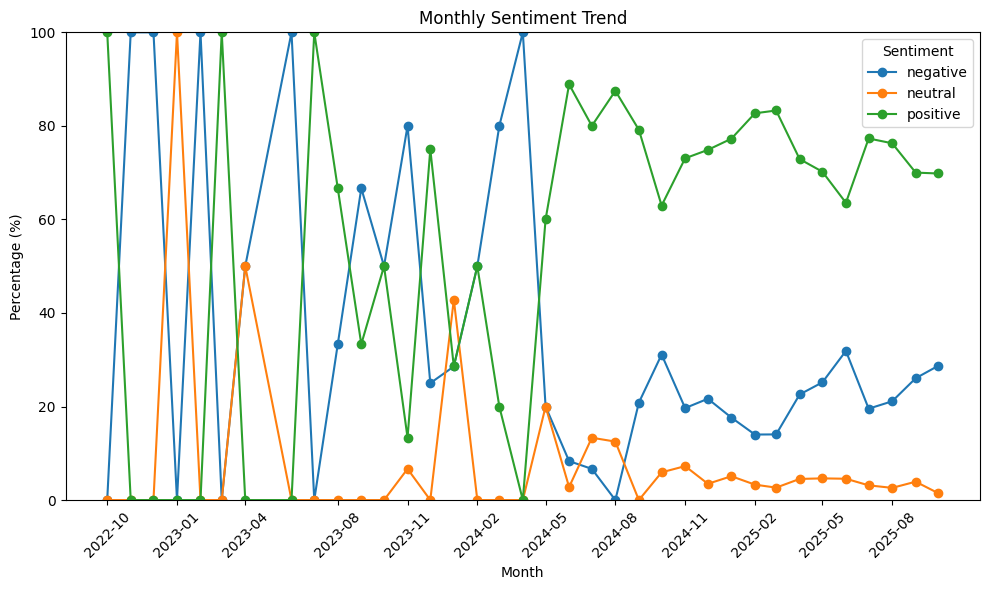

In [53]:
import matplotlib.dates as mdates

# Convert PeriodIndex to real datetime
monthly_pct.index = monthly_pct.index.to_timestamp()

plt.figure(figsize=(10,6))

for col in monthly_pct.columns:
    plt.plot(monthly_pct.index, monthly_pct[col], marker="o", label=col)

plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(title="Sentiment")

plt.xticks(monthly_pct.index[::3], rotation=45)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.ylim(0,100)
plt.tight_layout()
plt.show()

**Observation**


From mid-2023 onward, positive sentiment consistently dominates, generally ranging between approximately 65% and 85%, indicating stable overall user satisfaction.

Negative sentiment fluctuates between roughly 15% and 30%, with a mild upward trend observed toward 2025. However, no sharp or crisis-level spikes are detected.

Neutral sentiment remains consistently low across most months.

Early months display extreme percentage volatility due to low review volume, which exaggerates proportional changes. Once review volume stabilises, the sentiment distribution appears relatively steady.


## 4.5 Text Pattern Analysis

Adidas is selected for deeper text analysis due to its relatively higher negative sentiment proportion observed in Section 4.1.


### 4.5.1 Word Frequency (Unigram – Adidas Negative Reviews)

- Purpose: To identify dominant single-word complaint themes in Adidas negative reviews.


- Question: What recurring single-word terms appear most frequently in Adidas negative reviews?

In [54]:
# Filter Adidas Negative Reviews
adidas_negative = df_clean[
    (df_clean["brand"] == "adidas") &
    (df_clean["sentiment_label"] == "negative")
]

print("Number of Adidas Negative Reviews:", len(adidas_negative))
adidas_negative.head()

Number of Adidas Negative Reviews: 766


,brand,review_id,score,review_datetime,content,thumbs_up,review_created_version,year_month,content_length_chars,content_length_words,clean_content,sentiment_label
2000,adidas,1c38bed2-6fa6-4ea6-acd3-fbdc6b0ced5e,1,2025-10-10 00:48:36,always error every time i check out,0,5.54.0,2025-10,35,7,always error every time check,negative
2002,adidas,605b2e40-3f46-441b-ae5c-2894741a52c4,2,2025-10-09 07:53:57,The application is displaying an inaccurate po...,0,5.53.1,2025-10,128,20,application displaying inaccurate points where...,negative
2003,adidas,547f2b7a-63e0-4ce4-b1a4-19eabfe414b2,1,2025-10-08 22:18:57,"horrible on s11 ultra, fix tablet layout!",0,5.54.0,2025-10,41,7,horrible ultra fix tablet layout,negative
2004,adidas,4fa4f53a-b6ce-4f06-8ea1-9709b77a7ae1,1,2025-10-08 16:48:33,After-sales service is really bad. The only op...,0,5.53.1,2025-10,495,93,sales service really bad option reach ask refu...,negative
2005,adidas,43434b6d-f7e7-46a5-a6d7-3311d300c671,1,2025-10-08 15:25:12,They use FEDEX so my order is never delivered ...,0,5.53.1,2025-10,225,46,use fedex order never delivered correct addres...,negative


In [55]:
# Extract Most Frequent Words to transform text data into measurable numerical patterns.

from collections import Counter
import re

stop_words = set(stopwords.words("english"))

# Add custom stopwords specific to your dataset/context
custom_stopwords = {
    "adidas", "app",  # brand/general
    "not", "no", "dont", "doesnt", "cant", "couldnt", "won", "wont", "didnt", "isnt", "wasnt", "aren't",
    "even", "still", "get", "got", "one", "would", "also", "really", "much", "very",
    "im", "ive", "youre", "theyre", "thats", "theres", "whats"
}


# Join all negative reviews into one text
text = " ".join(adidas_negative["clean_content"].dropna())

# Simple tokenization
words = re.findall(r"\b\w+\b", text.lower())

stop_words = stop_words.union(custom_stopwords)

# Remove stopwords and very short tokens
words_clean = [w for w in words if (w not in stop_words and len(w) > 2)]


word_counts = Counter(words_clean)
top_words = word_counts.most_common(20)

top_words_df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
display(top_words_df)


,Word,Frequency
0,order,162
1,customer,111
2,service,108
3,worst,89
4,refund,77
5,time,64
6,experience,64
7,bad,62
8,shoes,60
9,work,53


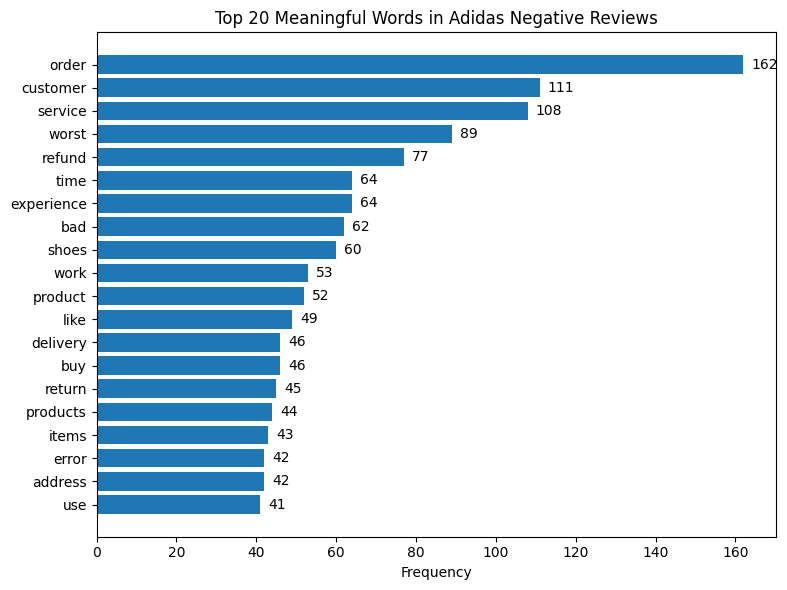

In [56]:
plt.figure(figsize=(8, 6))
bars = plt.barh(top_words_df["Word"], top_words_df["Frequency"])

plt.xlabel("Frequency")
plt.title("Top 20 Meaningful Words in Adidas Negative Reviews")
plt.gca().invert_yaxis()

# Add frequency labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 2,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va="center"
    )

plt.tight_layout()
plt.show()

**Observation**

The word frequency analysis reveals dominant complaint themes such as "order", "customer", "service", "refund", and "delivery". These findings suggest that negative sentiment toward the Adidas application is largely driven by order fulfilment issues and dissatisfaction with customer service support. Additionally, the presence of terms such as "error" and "address" indicates potential logistical or technical problems within the purchasing workflow.


Overall, the findings suggest that post-purchase service quality and order management are primary contributors to negative sentiment observed for Adidas.

### 4.5.2 Bigram Analysis

#### 4.5.2.1 Key Complaint Themes (Negative Reviews)

- Purpose: To identify recurring two-word complaint phrases in negative reviews in order to uncover specific operational and service-related issues.

- Question: What recurring complaint phrases (bigrams) appear most frequently in negative reviews, and what do they reveal about user dissatisfaction?

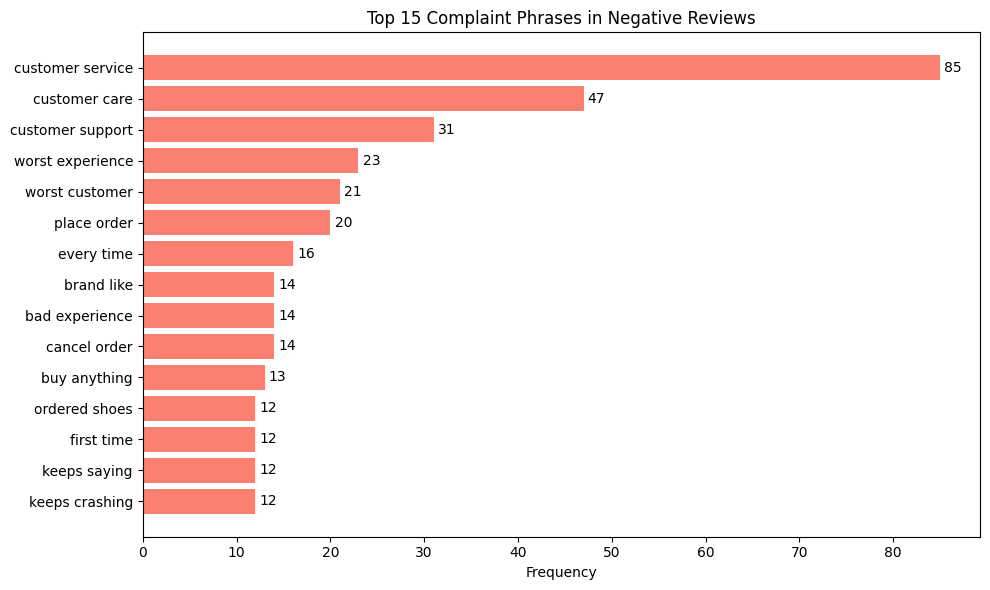

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract Negative Reviews
neg_text = df_clean.loc[df_clean["sentiment_label"] == "negative", "clean_content"].dropna()

# Vectorization
neg_vec = CountVectorizer(
    ngram_range=(2, 2),
    min_df=5,
    stop_words=list(stop_words.union({"app", "adidas", "puma", "nike", "gymshark"}))
)

X_neg = neg_vec.fit_transform(neg_text)
neg_counts = X_neg.sum(axis=0).A1
neg_features = neg_vec.get_feature_names_out()

top_neg_df = pd.DataFrame({"Bigram": neg_features, "Frequency": neg_counts}).sort_values("Frequency", ascending=False).head(15)

# Plotting with Labels
plt.figure(figsize=(10, 6))
bars = plt.barh(top_neg_df["Bigram"], top_neg_df["Frequency"], color="salmon")

# Add the data labels on the bars
plt.bar_label(bars, padding=3)

plt.xlabel("Frequency")
plt.title("Top 15 Complaint Phrases in Negative Reviews")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Observation**

The bigram analysis provides more specific complaint insights compared to single-word frequency analysis. The most frequent phrases include “customer service”, “not working”, “doesnt work”, and “place order”. These recurring patterns indicate that negative sentiment is largely driven by service responsiveness issues, application malfunction, and order processing problems. The results reinforce earlier word frequency findings and provide clearer direction for operational and user experience improvements.

#### 4.5.2.2 Key Success Drivers (Positive Reviews)

Purpose: To identify what users value most and what the brands are doing well.

Question: What recurring positive bigram phrases appear most frequently in positive reviews, and what do they reveal about key drivers of user satisfaction?


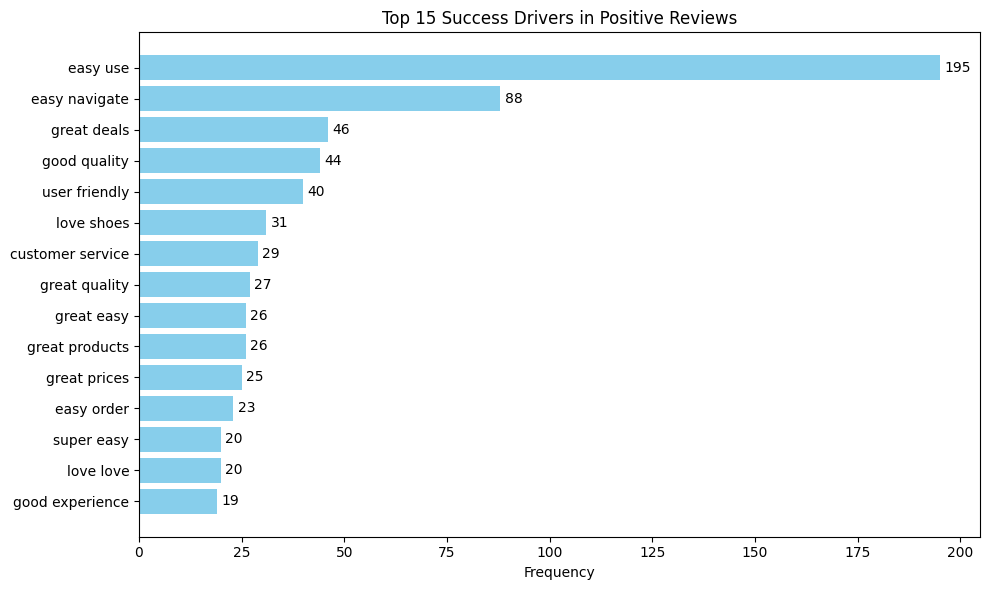

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract Positive Reviews
pos_text = df_clean.loc[df_clean["sentiment_label"] == "positive", "clean_content"].dropna()

# Vectorization
pos_vec = CountVectorizer(
    ngram_range=(2, 2),
    min_df=5,
    stop_words=list(stop_words.union({"app", "adidas", "puma", "nike", "gymshark"}))
)

X_pos = pos_vec.fit_transform(pos_text)
pos_counts = X_pos.sum(axis=0).A1
pos_features = pos_vec.get_feature_names_out()

top_pos_df = pd.DataFrame({"Bigram": pos_features, "Frequency": pos_counts}).sort_values("Frequency", ascending=False).head(15)

# Plotting with Labels
plt.figure(figsize=(10, 6))
bars = plt.barh(top_pos_df["Bigram"], top_pos_df["Frequency"], color="skyblue")

# Add the data labels on the bars
plt.bar_label(bars, padding=3)

plt.xlabel("Frequency")
plt.title("Top 15 Success Drivers in Positive Reviews")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Observation**

The analysis of positive bigrams highlights the primary drivers of user satisfaction across the sportswear applications. Dominant phrases such as “easy use,” “easy navigate,” and “good quality” indicate that users strongly value interface simplicity, usability, and product reliability.

In contrast to negative reviews that emphasize service and operational issues, positive feedback centers on seamless user experience, smooth navigation, and overall product quality.

These recurring success drivers suggest that maintaining intuitive design and consistent product standards is critical to sustaining positive brand perception and competitive advantage.


####  4.5.2.3 Comparison of Sentiment Patterns

Purpose: To compare dominant bigram themes across negative and positive reviews to highlight contrasting pain points and satisfaction drivers.


Question: How do negative complaint phrases differ from positive success-driving phrases, and what does this contrast reveal about overall user experience?


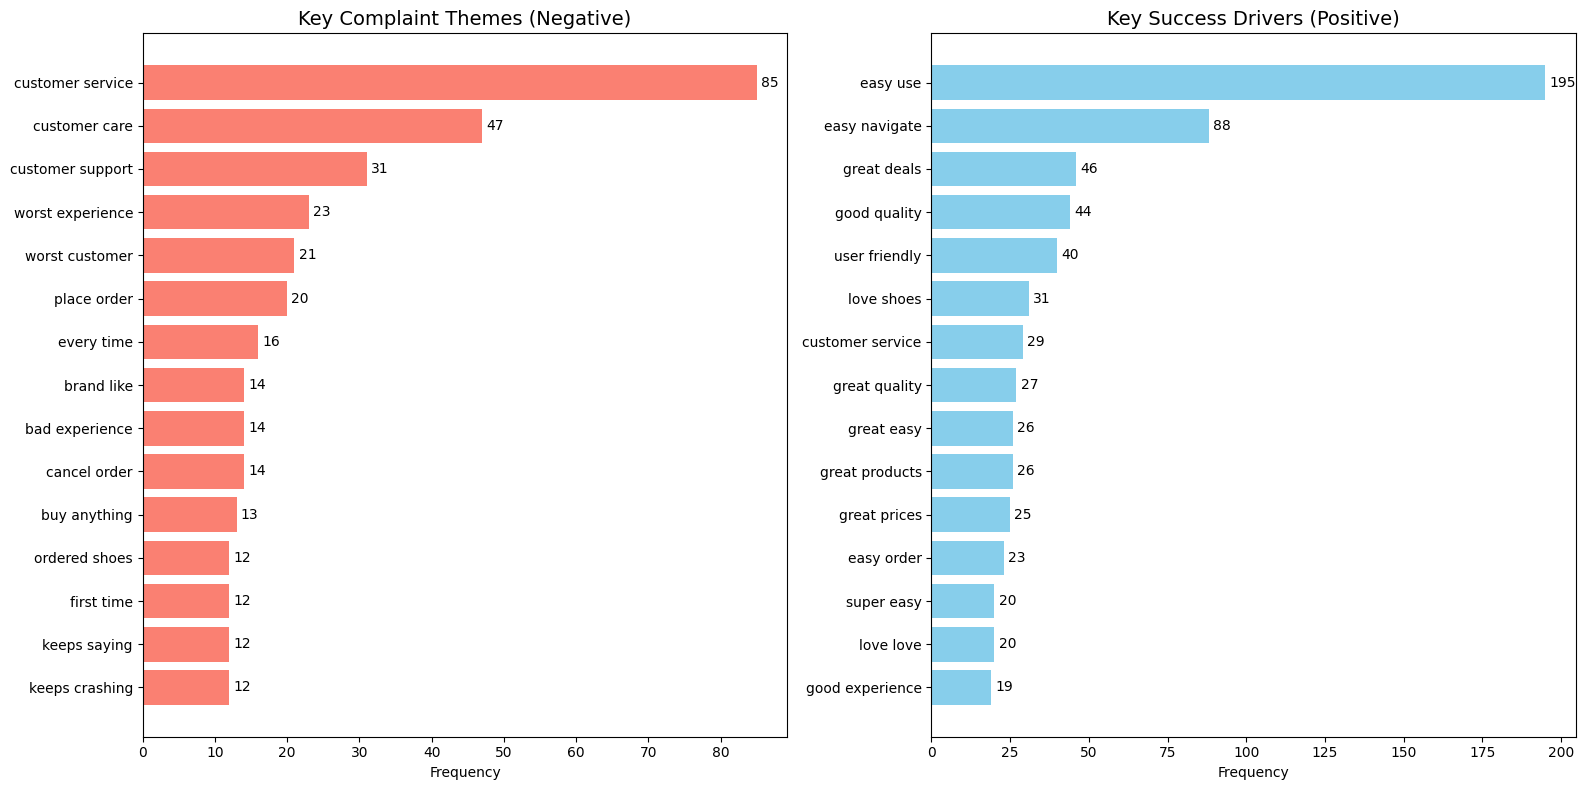

In [59]:
# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# --- Plot 1: Negative Bigrams (Pain Points) ---
bars_neg = ax1.barh(top_neg_df["Bigram"], top_neg_df["Frequency"], color="salmon")
ax1.bar_label(bars_neg, padding=3)
ax1.set_title("Key Complaint Themes (Negative)", fontsize=14)
ax1.invert_yaxis()
ax1.set_xlabel("Frequency")

# --- Plot 2: Positive Bigrams (Success Drivers) ---
bars_pos = ax2.barh(top_pos_df["Bigram"], top_pos_df["Frequency"], color="skyblue")
ax2.bar_label(bars_pos, padding=3)
ax2.set_title("Key Success Drivers (Positive)", fontsize=14)
ax2.invert_yaxis()
ax2.set_xlabel("Frequency")

plt.tight_layout()
plt.show()

**Observation**

The comparison of bigram patterns reveals a clear contrast between dissatisfaction and satisfaction drivers.

Negative reviews are dominated by service-related and operational issues, with frequent phrases such as “customer service,” “cancel order,” and “worst experience.” These indicate concerns related to support responsiveness and transactional reliability.

In contrast, positive reviews emphasize usability and product quality, highlighted by phrases such as “easy use,” “easy navigate,” and “good quality.” This suggests that seamless interface design and consistent product standards are key contributors to positive sentiment.

The divergence between operational complaints and experiential strengths highlights specific areas where brands must improve backend service processes while preserving user interface excellence.


# 5. Modelling

**Modelling Rationale**


Although sentiment labels were derived from rating scores (1–5) using explicit rules, machine learning modelling is still necessary.

The score-derived labels are treated as ground truth to train a classifier that predicts sentiment based solely on review text. This enables automated sentiment classification in situations where rating scores may be unavailable or when analysing future incoming text data.

Perfect alignment between score and sentiment label is expected by design. The modelling process evaluates how well textual features alone can capture rating-based sentiment signals and assesses the feasibility of automated deployment.



### 5.1 Train–Test Split

In [60]:
from sklearn.model_selection import train_test_split

# Step 1 - Define X (features) and y (target)
X = df_clean["clean_content"]
y = df_clean["sentiment_label"]

# Step 2 - Train/Test Split (keep same split later for TF-IDF)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y       # for imbalanced data
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

print("\nTrain label distribution:")
print(y_train.value_counts(normalize=True).round(3))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True).round(3))

Train size: 5062
Test size: 1266

Train label distribution:
sentiment_label
positive    0.738
negative    0.222
neutral     0.040
Name: proportion, dtype: float64

Test label distribution:
sentiment_label
positive    0.738
negative    0.222
neutral     0.040
Name: proportion, dtype: float64


### 5.2 BoW Vectorisation

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 3 — BoW vectorisation
bow = CountVectorizer(
    max_features=20000, #safe upper cap
    ngram_range=(1, 1), #unigrams (standard baseline)
    min_df=2            #removes extremely rare words (good noise control)
)

X_train_bow = bow.fit_transform(X_train)
X_test_bow  = bow.transform(X_test)

print("BoW train shape:", X_train_bow.shape)
print("BoW test shape:", X_test_bow.shape)

BoW train shape: (5062, 2069)
BoW test shape: (1266, 2069)


In [62]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 2069


To store the model performance result for comparison

In [63]:
results = []

### 5.3 Model Training - Multinomial Naive Bayes (BoW)

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Model
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

# Predict
y_pred_nb = nb_bow.predict(X_test_bow)

# Evaluate
print("Naive Bayes (BoW)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 3))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print()

print("Classification Report:")
print(classification_report(y_test, y_pred_nb, digits=3))

Naive Bayes (BoW)
Accuracy: 0.904

Confusion Matrix:
[[245   1  35]
 [ 23   5  23]
 [ 39   1 894]]

Classification Report:
              precision    recall  f1-score   support

    negative      0.798     0.872     0.833       281
     neutral      0.714     0.098     0.172        51
    positive      0.939     0.957     0.948       934

    accuracy                          0.904      1266
   macro avg      0.817     0.642     0.651      1266
weighted avg      0.899     0.904     0.891      1266



**Observation**

The Multinomial Naive Bayes model achieved an overall accuracy of 90.4%, indicating strong predictive performance. The model performs particularly well in identifying positive reviews (F1-score = 0.948) and negative reviews (F1-score = 0.833). However, performance on the neutral class is substantially weaker (F1-score = 0.172), likely due to class imbalance and the subtle linguistic differences between neutral and polarized sentiments. Overall, the model demonstrates effective classification of polarized sentiments but struggles with neutral review detection.

### 5.4 Model Training - Logistic Regression (BoW)

In [65]:
from sklearn.linear_model import LogisticRegression

lr_bow = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
    )
lr_bow.fit(X_train_bow, y_train)

# Predict
y_pred_lr = lr_bow.predict(X_test_bow)

# Evaluate
print("Logistic Regression (BoW)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print()

print("Classification Report:")
print(classification_report(y_test, y_pred_lr, digits=3))

Logistic Regression (BoW)
Accuracy: 0.865

Confusion Matrix:
[[221  23  37]
 [ 22  11  18]
 [ 42  29 863]]

Classification Report:
              precision    recall  f1-score   support

    negative      0.775     0.786     0.781       281
     neutral      0.175     0.216     0.193        51
    positive      0.940     0.924     0.932       934

    accuracy                          0.865      1266
   macro avg      0.630     0.642     0.635      1266
weighted avg      0.873     0.865     0.869      1266



**Observation**

When using Bag-of-Words features, Multinomial Naive Bayes achieved higher overall accuracy (0.904) compared to Logistic Regression (0.865). Although Logistic Regression with class balancing slightly improved neutral class recall, the improvement was marginal and came at the cost of reduced overall performance. Given the dataset’s class imbalance and word-frequency-based representation, Naive Bayes appears more suitable for this feature setup.

### 5.5 Model Performance Comparison (BoW)

In [66]:
from sklearn.metrics import f1_score, recall_score

# BoW + Naive Bayes
results.append({
    "features": "BoW",
    "model": "Naive Bayes",
    "accuracy": accuracy_score(y_test, y_pred_nb),
    "macro_f1": f1_score(y_test, y_pred_nb, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred_nb, average="weighted"),
    "neutral_recall": recall_score(
        y_test, y_pred_nb,
        labels=["neutral"],
        average=None,
        zero_division=0
    )[0]
})

# BoW + Logistic Regression
results.append({
    "features": "BoW",
    "model": "Logistic Regression",
    "accuracy": accuracy_score(y_test, y_pred_lr),
    "macro_f1": f1_score(y_test, y_pred_lr, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred_lr, average="weighted"),
    "neutral_recall": recall_score(
        y_test, y_pred_lr,
        labels=["neutral"],
        average=None,
        zero_division=0
    )[0]
})

results_df = pd.DataFrame(results)

results_df.round(3)

,features,model,accuracy,macro_f1,weighted_f1,neutral_recall
0,BoW,Naive Bayes,0.904,0.651,0.891,0.098
1,BoW,Logistic Regression,0.865,0.635,0.869,0.216


**Observation**

The comparison shows that Multinomial Naive Bayes achieved higher overall accuracy (0.904) and macro F1-score compared to Logistic Regression when using BoW features. However, Logistic Regression improved neutral recall (0.216 vs 0.098), indicating better detection of the minority neutral class. Given the strong class imbalance in the dataset, Naive Bayes appears more suitable for BoW representation, though neutral classification remains challenging.

### 5.6 TF-IDF Feature Representation (Unigram)

#### 5.6.1 TF-IDF Vectorisation (1,1)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF (Unigram)
tfidf_11 = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 1), # Unigram -  keep same as BoW first
    min_df=2
)

X_train_tfidf_11 = tfidf_11.fit_transform(X_train)
X_test_tfidf_11  = tfidf_11.transform(X_test)

print("TF-IDF (1,1) train shape:", X_train_tfidf_11.shape)
print("TF-IDF (1,1) test shape:", X_test_tfidf_11.shape)
print("Vocabulary size:", len(tfidf_11.vocabulary_))

TF-IDF (1,1) train shape: (5062, 2069)
TF-IDF (1,1) test shape: (1266, 2069)
Vocabulary size: 2069


#### 5.6.2 Train Naive Bayes (TF-IDF 1,1)

In [68]:
# Train Naive Bayes with TF-IDF

nb_tfidf_11 = MultinomialNB()

#Train
nb_tfidf_11.fit(X_train_tfidf_11, y_train)

# Predict
y_pred_nb_tfidf_11 = nb_tfidf_11.predict(X_test_tfidf_11)

# Evaluate
print("Naive Bayes (TF-IDF 1,1)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb_tfidf_11), 3))
print()
print(classification_report(y_test, y_pred_nb_tfidf_11, digits=3))


Naive Bayes (TF-IDF 1,1)
Accuracy: 0.897

              precision    recall  f1-score   support

    negative      0.822     0.808     0.815       281
     neutral      0.000     0.000     0.000        51
    positive      0.918     0.973     0.945       934

    accuracy                          0.897      1266
   macro avg      0.580     0.594     0.587      1266
weighted avg      0.860     0.897     0.878      1266



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Observation**

When applying Multinomial Naive Bayes with TF-IDF features, the model failed to predict the neutral class, resulting in zero recall and triggering an UndefinedMetricWarning. This is likely due to severe class imbalance and the incompatibility between TF-IDF weighting and the probabilistic assumptions of Naive Bayes.

#### 5.6.3 Train Logistic Regression (TF-IDF 1,1)

In [69]:
# Train Logistic Regression with TF-IDF (1,1)

from sklearn.linear_model import LogisticRegression

lr_tfidf_11 = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)
lr_tfidf_11.fit(X_train_tfidf_11, y_train)

# Predict
y_pred_lr_tfidf_11 = lr_tfidf_11.predict(X_test_tfidf_11)

# Evaluate
print("Logistic Regression (TF-IDF 1,1)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr_tfidf_11), 3))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tfidf_11))
print()

print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tfidf_11, digits=3))

Logistic Regression (TF-IDF 1,1)
Accuracy: 0.864

Confusion Matrix:
[[233  24  24]
 [ 24  11  16]
 [ 50  34 850]]

Classification Report:
              precision    recall  f1-score   support

    negative      0.759     0.829     0.793       281
     neutral      0.159     0.216     0.183        51
    positive      0.955     0.910     0.932       934

    accuracy                          0.864      1266
   macro avg      0.624     0.652     0.636      1266
weighted avg      0.879     0.864     0.871      1266



**Observation**

TF-IDF combined with Logistic Regression achieved an accuracy of 0.864, comparable to the BoW + Logistic Regression model. However, performance on the neutral class remains limited due to severe class imbalance (only 4% of the dataset). Although class balancing was applied, the minority class remains difficult to predict reliably.

####  5.6.4 Train Support Vector Machine (TF-IDF 1,1)

In [70]:
# Train Support Vector Machine (TF-IDF 1,1) using LinearSVC

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train SVM (Linear)
svm_tfidf_11 = LinearSVC(class_weight="balanced", random_state=42)
svm_tfidf_11.fit(X_train_tfidf_11, y_train)

# Predict
y_pred_svm_tfidf_11 = svm_tfidf_11.predict(X_test_tfidf_11)

# Evaluate
print("SVM (TF-IDF 1,1)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm_tfidf_11), 3))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_tfidf_11))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_tfidf_11, digits=3))

SVM (TF-IDF 1,1)
Accuracy: 0.884

Confusion Matrix:
[[230  13  38]
 [ 23   9  19]
 [ 35  19 880]]

Classification Report:
              precision    recall  f1-score   support

    negative      0.799     0.819     0.808       281
     neutral      0.220     0.176     0.196        51
    positive      0.939     0.942     0.941       934

    accuracy                          0.884      1266
   macro avg      0.652     0.646     0.648      1266
weighted avg      0.879     0.884     0.881      1266



#### 5.6.5 Append to Comparison Table & Model Performance Comparison

In [71]:
# Append TF-IDF (1,1) + Naive Bayes
results.append({
    "features": "TF-IDF (1,1)",
    "model": "Naive Bayes",
    "accuracy": accuracy_score(y_test, y_pred_nb_tfidf_11),
    "macro_f1": f1_score(y_test, y_pred_nb_tfidf_11, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred_nb_tfidf_11, average="weighted"),
    "neutral_recall": recall_score(
        y_test, y_pred_nb_tfidf_11,
        labels=["neutral"],
        average=None,
        zero_division=0
    )[0]
})

# Append TF-IDF (1,1) + Logistic Regression
results.append({
    "features": "TF-IDF (1,1)",
    "model": "Logistic Regression",
    "accuracy": accuracy_score(y_test, y_pred_lr_tfidf_11),
    "macro_f1": f1_score(y_test, y_pred_lr_tfidf_11, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred_lr_tfidf_11, average="weighted"),
    "neutral_recall": recall_score(
        y_test, y_pred_lr_tfidf_11,
        labels=["neutral"],
        average=None,
        zero_division=0
    )[0]
})

# Append TF-IDF (1,1) + SVN
results.append({
    "features": "TF-IDF (1,1)",
    "model": "SVM (LinearSVC)",
    "accuracy": accuracy_score(y_test, y_pred_svm_tfidf_11),
    "macro_f1": f1_score(y_test, y_pred_svm_tfidf_11, average="macro"),
    "weighted_f1": f1_score(y_test, y_pred_svm_tfidf_11, average="weighted"),
    "neutral_recall": recall_score(
        y_test, y_pred_svm_tfidf_11,
        labels=["neutral"],
        average=None,
        zero_division=0
    )[0]
})

In [72]:
# results_df = pd.DataFrame(results)
# results_df.round(3)

# Rebuild dataframe cleanly
results_df = pd.DataFrame(results)

# Sort for cleaner presentation
results_df = results_df.sort_values(["features", "model"]).reset_index(drop=True)

# Ensure numeric columns are float
numeric_cols = ["accuracy", "macro_f1", "weighted_f1", "neutral_recall"]
results_df[numeric_cols] = results_df[numeric_cols].astype(float)

# Styling: highlight best value in each metric column
styled_results = (
    results_df.style
    .highlight_max(subset=numeric_cols, color="lightgreen")
    .format({col: "{:.3f}" for col in numeric_cols})
)
styled_results

,features,model,accuracy,macro_f1,weighted_f1,neutral_recall
0,BoW,Logistic Regression,0.865,0.635,0.869,0.216
1,BoW,Naive Bayes,0.904,0.651,0.891,0.098
2,"TF-IDF (1,1)",Logistic Regression,0.864,0.636,0.871,0.216
3,"TF-IDF (1,1)",Naive Bayes,0.897,0.587,0.878,0.000
4,"TF-IDF (1,1)",SVM (LinearSVC),0.884,0.648,0.881,0.176


**Observation**



From the comparison results, Bag-of-Words with Naive Bayes achieved the highest macro F1-score (0.651) and the highest overall accuracy (0.904), indicating better balanced performance across sentiment classes.

Although Logistic Regression achieved higher neutral recall (0.216), its macro F1-score was lower. Since the dataset is imbalanced and macro F1-score assigns equal importance to all classes, including the minority neutral class, it is considered a more reliable indicator of balanced performance.

TF-IDF with Naive Bayes showed weaker minority-class performance, with neutral recall dropping to 0.000 and macro F1 decreasing to 0.587.

Therefore, Bag-of-Words with Naive Bayes demonstrates the most stable and balanced performance across classes and is selected as the final model.

### 5.7 Hyperparameter Tuning – TF-IDF + SVM

#### 5.7.1 GridSearchCV Setup (Moderate)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Pipeline: TF-IDF (1,1) + LinearSVC
svm_tfidf_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,1))),   # keep unigram
    ("clf", LinearSVC(random_state=42))
])

# Moderate parameter grid (not too big)
param_grid = {
    # TF-IDF tuning (moderate)
    "tfidf__min_df": [1, 2],
    "tfidf__max_df": [0.9, 1.0],
    "tfidf__sublinear_tf": [True, False],

    # SVM tuning (moderate)
    "clf__C": [0.1, 1, 10],
    "clf__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(
    svm_tfidf_pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # best for imbalanced classes
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nBest Params:", grid_search.best_params_)
print("\nBest CV Macro F1:", round(grid_search.best_score_, 4))


Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'tfidf__max_df': 0.9, 'tfidf__min_df': 2, 'tfidf__sublinear_tf': True}

Best CV Macro F1: 0.6454


#### 5.7.2 Evaluate Tuned Model on Test Set

In [74]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

best_svm = grid_search.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

acc = accuracy_score(y_test, y_pred_svm_tuned)
macro_f1 = f1_score(y_test, y_pred_svm_tuned, average="macro")
weighted_f1 = f1_score(y_test, y_pred_svm_tuned, average="weighted")
neutral_recall = recall_score(y_test, y_pred_svm_tuned, labels=["neutral"], average=None)[0]

print("TUNED TF-IDF (1,1) + LinearSVC")
print("Accuracy:", round(acc, 3))
print("Macro F1:", round(macro_f1, 3))
print("Weighted F1:", round(weighted_f1, 3))
print("Neutral Recall:", round(neutral_recall, 3))

print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_tuned, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned))


TUNED TF-IDF (1,1) + LinearSVC
Accuracy: 0.891
Macro F1: 0.644
Weighted F1: 0.886
Neutral Recall: 0.137

Classification Report:
               precision    recall  f1-score   support

    negative      0.790     0.843     0.816       281
     neutral      0.226     0.137     0.171        51
    positive      0.945     0.946     0.946       934

    accuracy                          0.891      1266
   macro avg      0.654     0.642     0.644      1266
weighted avg      0.882     0.891     0.886      1266

Confusion Matrix:
 [[237  14  30]
 [ 23   7  21]
 [ 40  10 884]]


#### 5.7.3 Compare Against BoW+NB Baseline (baseline)

In [75]:
print(y_test.unique())

['neutral' 'positive' 'negative']


In [76]:
import pandas as pd

compare_df = pd.DataFrame([
    {
        "model": "BoW + Naive Bayes (baseline)",
        "accuracy": accuracy_score(y_test, y_pred_nb),
        "macro_f1": f1_score(y_test, y_pred_nb, average="macro"),
        "weighted_f1": f1_score(y_test, y_pred_nb, average="weighted"),
        "neutral_recall": recall_score(y_test, y_pred_nb, labels=["neutral"], average=None)[0]
    },
    {
        "model": "TF-IDF (1,1) + SVM (tuned)",
        "accuracy": accuracy_score(y_test, y_pred_svm_tuned),
        "macro_f1": f1_score(y_test, y_pred_svm_tuned, average="macro"),
        "weighted_f1": f1_score(y_test, y_pred_svm_tuned, average="weighted"),
        "neutral_recall": recall_score(y_test, y_pred_svm_tuned, labels=["neutral"], average=None)[0]
    }
])

(
    compare_df.style
    .format({"accuracy":"{:.3f}", "macro_f1":"{:.3f}", "weighted_f1":"{:.3f}", "neutral_recall":"{:.3f}"})
    .highlight_max(subset=["accuracy","macro_f1","weighted_f1","neutral_recall"], color="lightgreen")
)


,model,accuracy,macro_f1,weighted_f1,neutral_recall
0,BoW + Naive Bayes (baseline),0.904,0.651,0.891,0.098
1,"TF-IDF (1,1) + SVM (tuned)",0.891,0.644,0.886,0.137


#### 5.7.4 Confusion Matrix – 3-Class Baseline (BoW + Naive Bayes)

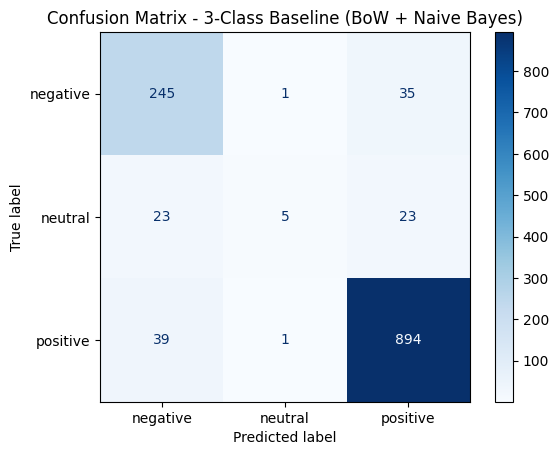

In [77]:
# Confusion Matrix Heatmap

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#label order
labels_order = ["negative", "neutral", "positive"]

# y_pred_nb => BoW + Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb, labels=labels_order)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_order)
disp.plot(values_format="d", cmap="Blues")
plt.title("Confusion Matrix - 3-Class Baseline (BoW + Naive Bayes)")
plt.show()

**Observation**


The confusion matrix indicates strong classification performance for positive and negative reviews, with most instances correctly predicted. However, neutral reviews are frequently misclassified as either negative or positive, reflecting the impact of class imbalance and limited neutral training examples. This observation supports the prioritisation of Macro F1-score over overall accuracy.

This conclusion applies within the initial 3-class setting; however, Neutral ambiguity motivated the later binary redesign (Section 5.8).


### 5.8 Model Improvement – Binary Dissatisfaction Detection

This section improves business applicability by redesigning the task into a binary classification problem.

Neutral reviews (Rating = 3) are removed because they are ambiguous and represent a small portion of the dataset (~4%).
The new objective is to detect dissatisfaction (Negative) versus satisfaction (Positive).

Binary Label Definition:
- Negative (Dissatisfied): Ratings 1–2  
- Positive (Satisfied): Ratings 4–5  
- Neutral (Rating 3): Dropped

#### 5.8.1 Binary Redesign (Drop Neutral + Reclassify target)

In [78]:
label_counts = df_clean["sentiment_label"].value_counts()
label_percent = (label_counts / label_counts.sum() * 100).round(2)

print("\ndf_clean Shape: " , df_clean.shape)

print("\nSentiment Distribution:")
print(pd.DataFrame({"count": label_counts, "percent (%)": label_percent}))
print()



df_clean Shape:  (6328, 12)

Sentiment Distribution:
                 count  percent (%)
sentiment_label                    
positive          4668        73.77
negative          1407        22.23
neutral            253         4.00



In [79]:
df_bin = df_clean.copy()

# Drop neutral reviews (score == 3)
df_bin = df_bin[df_bin["score"] != 3].copy()

# Map to binary labels using clear business meaning
# negative = dissatisfied, positive = satisfied
df_bin["sentiment_binary"] = df_bin["score"].apply(lambda s: "negative" if s <= 2 else "positive")

print("Binary dataset shape:", df_bin.shape)
print("\nBinary label counts:")
print(df_bin["sentiment_binary"].value_counts())
print("\nBinary label proportion:")
print(df_bin["sentiment_binary"].value_counts(normalize=True).round(3))

Binary dataset shape: (6075, 13)

Binary label counts:
sentiment_binary
positive    4668
negative    1407
Name: count, dtype: int64

Binary label proportion:
sentiment_binary
positive    0.768
negative    0.232
Name: proportion, dtype: float64


In [80]:
display(df_bin.head(5))

,brand,review_id,score,review_datetime,content,thumbs_up,review_created_version,year_month,content_length_chars,content_length_words,clean_content,sentiment_label,sentiment_binary
0,nike,4e0beb34-9bc6-4dfb-9f73-8cf3750571fa,5,2025-10-10 05:12:32,great!,0,25.46.1,2025-10,6,1,great,positive,positive
1,nike,a944523b-a77a-4709-a77c-bd6c7e722be1,5,2025-10-10 03:59:34,excellent,0,25.45.1,2025-10,9,1,excellent,positive,positive
2,nike,b6b37895-02bc-4986-9316-0a830b0ead7d,4,2025-10-10 03:36:42,"If I didn’t have to keep logging in, it would ...",0,25.46.1,2025-10,55,12,keep logging would better,positive,positive
3,nike,1b6d59fa-7c85-4f4a-8232-5710bd15c80d,2,2025-10-10 02:53:05,not user friendly,0,NaN,2025-10,17,3,not user friendly,negative,negative
4,nike,85e31a6e-4695-4aae-8af6-44dde7719610,5,2025-10-10 02:41:37,Amazing,0,25.46.1,2025-10,7,1,amazing,positive,positive


#### 5.8.2 Binary Class Distribution

Check the new class distribution after removing Neutral reviews.  
Although Neutral is removed, the dataset remains imbalanced (Positive is still the majority).  
Therefore, imbalance-aware models (class_weight="balanced") are applied.


df_bin Shape:  (6075, 13) 

                  count  percent (%)
sentiment_binary                    
positive           4668        76.84
negative           1407        23.16


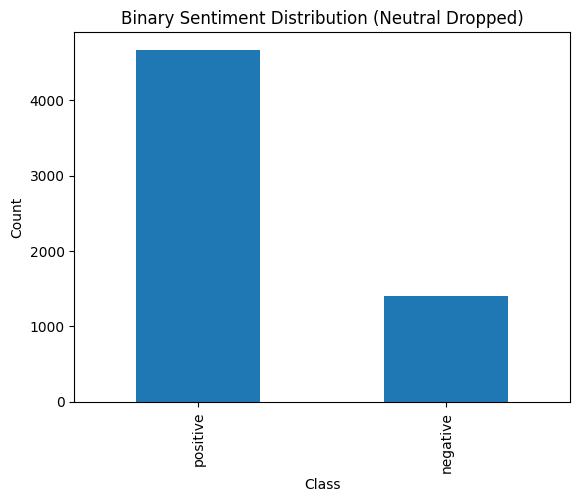

In [81]:
import matplotlib.pyplot as plt

bin_counts = df_bin["sentiment_binary"].value_counts()
bin_pct = df_bin["sentiment_binary"].value_counts(normalize=True) * 100

print("\ndf_bin Shape: " , df_bin.shape , "\n")

print(pd.DataFrame({
    "count": bin_counts,
    "percent (%)": bin_pct.round(2)
}))

plt.figure()
bin_counts.plot(kind="bar")
plt.title("Binary Sentiment Distribution (Neutral Dropped)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### 5.8.3 Train–Test Split (Binary)

Use the same splitting approach as earlier (80/20, random_state=42, stratify) to ensure a fair evaluation.

In [82]:
from sklearn.model_selection import train_test_split

X_bin = df_bin["clean_content"]
y_bin = df_bin["sentiment_binary"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_bin, y_bin,
    test_size=0.2,
    random_state=42,
    stratify=y_bin
)

print("Train size:", Xb_train.shape[0])
print("Test size:", Xb_test.shape[0])

print("\nTrain label distribution:")
print(yb_train.value_counts(normalize=True).round(3))

print("\nTest label distribution:")
print(yb_test.value_counts(normalize=True).round(3))

Train size: 4860
Test size: 1215

Train label distribution:
sentiment_binary
positive    0.768
negative    0.232
Name: proportion, dtype: float64

Test label distribution:
sentiment_binary
positive    0.769
negative    0.231
Name: proportion, dtype: float64


#### 5.8.4 Binary Model Implementation (Imbalance-aware)

Models used:
1) TF-IDF + LinearSVC (class_weight="balanced")  
2) TF-IDF + Logistic Regression (class_weight="balanced")  
3) TF-IDF + Complement Naive Bayes (designed for imbalanced text classification)

Evaluation focuses on:
- F1 (Negative class) → best reflects dissatisfaction detection
- Recall (Negative class) → how many complaints we catch
- Balanced Accuracy → fair metric for imbalanced classes
- Confusion Matrix → visual proof


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

binary_results = []

models = {
    "TF-IDF + LinearSVC (balanced)": LinearSVC(class_weight="balanced", random_state=42),
    "TF-IDF + LogisticRegression (balanced)": LogisticRegression(class_weight="balanced", max_iter=2000),
    "TF-IDF + ComplementNB": ComplementNB()
}

for model_name, clf in models.items():
    # Pipeline: TF-IDF unigram + classifier
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,1))),
        ("clf", clf)
    ])

    pipe.fit(Xb_train, yb_train)
    yb_pred = pipe.predict(Xb_test)

    # Key metrics for imbalanced binary classification
    acc = accuracy_score(yb_test, yb_pred)
    f1_neg = f1_score(yb_test, yb_pred, pos_label="negative")
    rec_neg = recall_score(yb_test, yb_pred, pos_label="negative")
    bal_acc = balanced_accuracy_score(yb_test, yb_pred)

    binary_results.append({
        "model": model_name,
        "accuracy": acc,
        "f1_negative": f1_neg,
        "recall_negative": rec_neg,
        "balanced_accuracy": bal_acc
    })

# Build results table
binary_results_df = pd.DataFrame(binary_results).sort_values("f1_negative", ascending=False).reset_index(drop=True)
binary_results_df = binary_results_df.round(3)
binary_results_df

,model,accuracy,f1_negative,recall_negative,balanced_accuracy
0,TF-IDF + LogisticRegression (balanced),0.931,0.861,0.929,0.930
1,TF-IDF + LinearSVC (balanced),0.933,0.858,0.883,0.915
2,TF-IDF + ComplementNB,0.916,0.837,0.932,0.922


The table above shows that TF-IDF + Logistic Regression (balanced) achieved the highest F1-score for the Negative class and the highest Balanced Accuracy. Therefore, it is considered the strongest candidate for dissatisfaction detection.

#### 5.8.5 Binary Model Evaluation

<Figure size 640x480 with 0 Axes>

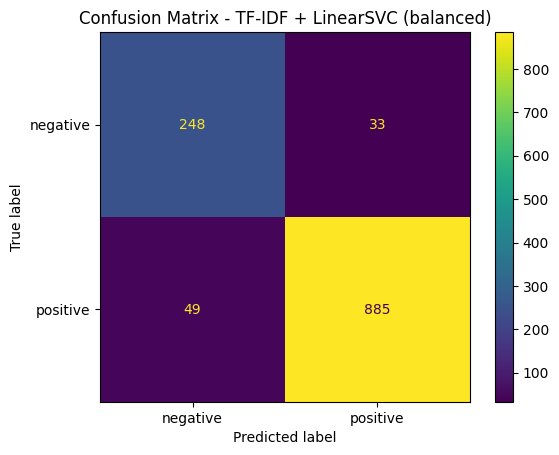

<Figure size 640x480 with 0 Axes>

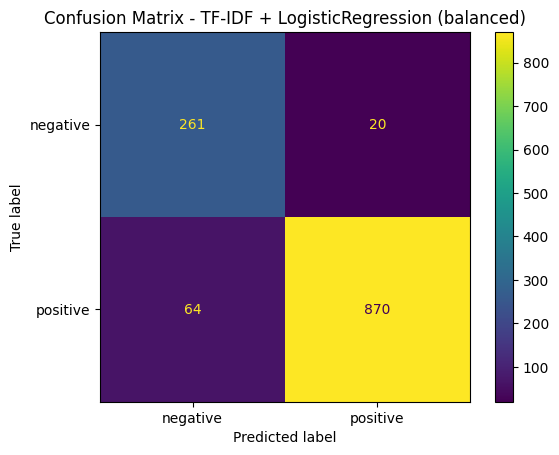

<Figure size 640x480 with 0 Axes>

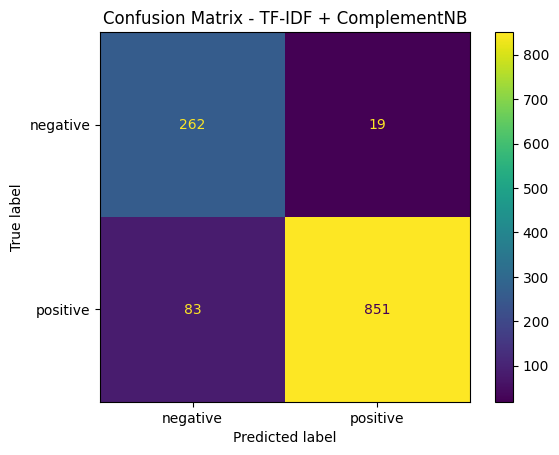

In [84]:
# Plot confusion matrices for each model (1 by 1)
for model_name, clf in models.items():
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,1))),
        ("clf", clf)
    ])
    pipe.fit(Xb_train, yb_train)
    yb_pred = pipe.predict(Xb_test)

    cm = confusion_matrix(yb_test, yb_pred, labels=["negative", "positive"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])

    plt.figure()
    disp.plot(values_format="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# 6. Evaluation

## 6.1 Performance Analysis (3-Class vs Binary Redesign)

The initial modelling phase applied multi-class classification (negative, neutral, positive).
Although the BoW + Naive Bayes model achieved the highest Macro F1-score (0.651) and strong overall accuracy, analysis revealed two key limitations:

1. Severe class imbalance (Positive ≈ 74%, Neutral ≈ 4%)
2. Frequent misclassification of Neutral reviews

While Macro F1 helped reduce majority bias, the model’s real-world business applicability remained limited, particularly for complaint monitoring.

To address this, the problem was redesigned into a binary dissatisfaction detection task by removing Neutral reviews (Rating = 3). This reduced ambiguity and aligned the model with operational goals: detecting dissatisfied users.

The binary redesign demonstrated significantly improved minority-class detection:

- F1-score (Negative) = 0.861  
- Recall (Negative) = 0.929  
- Balanced Accuracy = 0.930  

These results indicate strong capability in identifying dissatisfied customers while maintaining stable overall performance.


## 6.2 Final Model Selection

The final selected model is:

**TF-IDF (Unigram) + Logistic Regression (class_weight="balanced")**

This model achieved the highest F1-score for the Negative class and the highest Balanced Accuracy among evaluated binary classifiers.

Compared to the initial multi-class approach, the binary redesign:

- Improves dissatisfaction detection reliability  
- Reduces ambiguity caused by Neutral reviews  
- Aligns more closely with real-world business monitoring needs  

Therefore, the binary Logistic Regression model is considered the most practical and defensible solution for this project.


In [85]:
# Example: Use final binary model to predict new reviews (demo)
final_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,1))),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=2000))
])

final_pipe.fit(Xb_train, yb_train)

sample_texts = ["App is terrible, cannot login", "Love the new update, smooth and fast"]
final_pipe.predict(sample_texts)

array(['negative', 'positive'], dtype=object)

## 6.3 Business Implication

The selected model enables automated classification of new user reviews into:

- Negative (Dissatisfied)
- Positive (Satisfied)

This supports business monitoring by:

- Detecting emerging complaint signals early
- Prioritising high-risk negative reviews
- Supporting brand-level performance tracking
- Enabling scalable, data-driven sentiment monitoring

By focusing on dissatisfaction detection, the system provides more actionable insights compared to general sentiment classification.


# 7. Business Insights & Recommendations

Sentiment labels used in the business insight analysis were derived from user rating scores (score-based categorisation into positive, neutral, and negative) to ensure interpretability and consistency.

The modelling process was conducted to validate the feasibility of automated sentiment classification from text.

For practical deployment, the final model focuses on binary dissatisfaction detection (Negative vs Positive) to improve early identification of dissatisfied customers.


### Key Insights
- Across brands, sentiment is predominantly positive, indicating generally strong user satisfaction.
- Negative reviews receive higher average thumbs-up engagement, suggesting complaints resonate with other users and may reflect shared issues.
- Monthly sentiment trends are largely stable from mid-period onward, with no major crisis-level spikes; however, a mild increase in negative sentiment toward 2025 suggests emerging concerns worth monitoring.
- Text pattern analysis shows negative reviews commonly relate to service/operational issues (e.g., customer service, order and cancellation problems), while positive reviews emphasise usability and quality (e.g., easy use, easy navigation, good quality).

### Recommendations
1. **Prioritise high-engagement complaints**
   - Monitor negative reviews with high thumbs-up as early warning signals of systemic issues.

2. **Strengthen operational/service processes**
   - Improve customer support responsiveness, order tracking transparency, and refund/cancellation workflows where recurring complaint themes are detected.

3. **Protect key experience strengths**
   - Maintain and enhance usability features highlighted in positive reviews (ease of use, navigation, perceived quality).

4. **Implement ongoing sentiment monitoring**
   - Deploy a lightweight dashboard that tracks monthly sentiment distribution and flags increases in negative sentiment for early intervention.

5. **Integrate insights into continuous improvement**
   - Use recurring complaint themes as input for product fixes, service training, and operational redesign.


# 8. AI Ethics Considerations

### 1. Privacy

The dataset consists of publicly available Google Play Store reviews. No personally identifiable information (PII) was intentionally collected or analysed. However, user-generated text may contain self-disclosed personal details. To reduce privacy risk, preprocessing removed non-text characters and no attempt was made to identify or track individual users.

### 2. Bias & Fairness (Class Imbalance)

The dataset is imbalanced, with positive reviews forming the majority class. This may bias models toward predicting positive sentiment more frequently.

To mitigate this, imbalance-aware techniques were applied, including class_weight="balanced" and prioritisation of F1-score for the Negative class and Balanced Accuracy during evaluation. This ensures that dissatisfied users are not overlooked due to class imbalance.

Future improvements may include advanced resampling strategies or threshold optimisation to further enhance minority-class detection.

### 3. Transparency & Explainability

Sentiment labels were derived using explicit, rule-based mapping from rating scores (1–5), ensuring transparency in label construction.

Model selection decisions were based on clearly reported evaluation metrics (accuracy, F1-score, balanced accuracy, confusion matrix), ensuring methodological transparency.

Logistic Regression was selected as the final model due to its interpretability and stable performance.

### 4. Accountability

Model predictions are intended to support business decision-making rather than replace human judgement. Final decisions regarding product improvements or customer engagement strategies should involve human review.

### 5. Accuracy & Reliability

Although the selected binary model achieved strong performance in dissatisfaction detection, performance may vary over time as user feedback patterns evolve.

Continuous monitoring, periodic retraining, and performance auditing are recommended to maintain reliability and ensure responsible deployment.

# 9. Limitations

- Sentiment labels were derived from rating scores rather than independently annotated text labels.
- Sarcasm, irony, and contextual nuances may not be fully captured by traditional NLP models.
- The dataset remains class-imbalanced, which may affect detection of dissatisfied (negative) reviews despite the use of imbalance-aware techniques.
- Early months contain low review volume, which may affect trend stability.
- Non-English or mixed-language content was partially removed during preprocessing, potentially excluding some user perspectives.

- Binary redesign drops Neutral reviews, which may exclude moderately satisfied/ambivalent feedback.